In [3]:
# 라이브러리 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:title={'center':'한글'}>

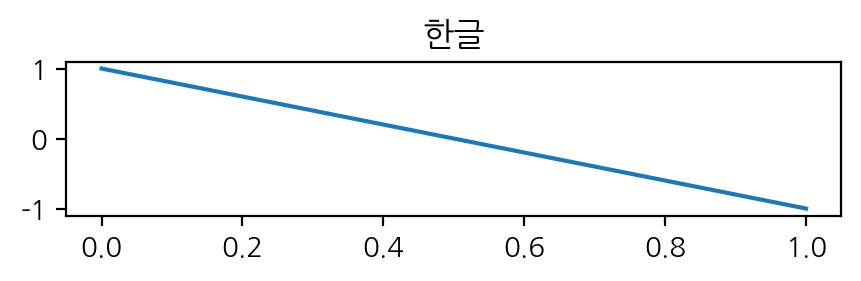

In [4]:
# 한글 적용
import koreanize_matplotlib

%config InlineBackend.figure_format = "retina"
pd.Series([1, -1]).plot(title="한글", figsize=(5, 1))

# 데이터 불러오기 

In [5]:
df = pd.read_csv("data/HP_2020_sample.csv")
df.shape

(769852, 15)

In [6]:
df.head()

,기준년도,가입자 일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,데이터 공개일자
0,2020,666669,8553063,3,2,9,26,2020-10-11,430102ATB,1.0,2,10,205.0,4100,2021-12-29
1,2020,666669,8553063,2,2,9,26,2020-10-11,438901ATB,1.0,2,10,70.0,1400,2021-12-29
2,2020,666669,8553063,4,2,9,26,2020-10-11,374602ATB,1.0,1,10,765.0,7650,2021-12-29
3,2020,666669,3116013,1,2,9,26,2020-05-02,546600CCM,1.0,1,1,1720.0,1720,2021-12-29
4,2020,666669,2241712,2,2,9,26,2020-05-30,451202ATE,1.0,2,7,41.0,574,2021-12-29


In [7]:
df.nunique()

기준년도                1
가입자 일련번호         9660
처방내역일련번호       187002
일련번호               22
성별코드                2
연령대코드(5세단위)        18
시도코드               17
요양개시일자            366
약품일반성분명코드        2218
1회 투약량            320
1일투약량              13
총투여일수             189
단가               2039
금액              14473
데이터 공개일자            1
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769852 entries, 0 to 769851
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   기준년도         769852 non-null  int64  
 1   가입자 일련번호     769852 non-null  int64  
 2   처방내역일련번호     769852 non-null  int64  
 3   일련번호         769852 non-null  int64  
 4   성별코드         769852 non-null  int64  
 5   연령대코드(5세단위)  769852 non-null  int64  
 6   시도코드         769852 non-null  int64  
 7   요양개시일자       769852 non-null  object 
 8   약품일반성분명코드    769801 non-null  object 
 9   1회 투약량       769852 non-null  float64
 10  1일투약량        769852 non-null  int64  
 11  총투여일수        769852 non-null  int64  
 12  단가           769852 non-null  float64
 13  금액           769852 non-null  int64  
 14  데이터 공개일자     769852 non-null  object 
dtypes: float64(2), int64(10), object(3)
memory usage: 88.1+ MB


# 데이터 전처리

## 결측치 제거 

In [9]:
# 결측치 개수 조회
df.isnull().sum()

기준년도            0
가입자 일련번호        0
처방내역일련번호        0
일련번호            0
성별코드            0
연령대코드(5세단위)     0
시도코드            0
요양개시일자          0
약품일반성분명코드      51
1회 투약량          0
1일투약량           0
총투여일수           0
단가              0
금액              0
데이터 공개일자        0
dtype: int64

In [10]:
# 결측치 있는 행 제거
df = df.dropna()
df.shape

(769801, 15)

In [11]:
# 안쓰는 데이터 컬럼 삭제

# 다른분들의 코드
# def df["데이터 공개일자"]
# df = df.drop(columns="데이터 공개일자")
df = df.drop("데이터 공개일자", axis=1)
df.head(2)

,기준년도,가입자 일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액
0,2020,666669,8553063,3,2,9,26,2020-10-11,430102ATB,1.0,2,10,205.0,4100
1,2020,666669,8553063,2,2,9,26,2020-10-11,438901ATB,1.0,2,10,70.0,1400


## 날짜 데이터 타입 변경 

In [17]:
# 데이터 타입 변경
df["요양개시일자"] = pd.to_datetime(df["요양개시일자"], format="%Y-%m-%d")

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 769801 entries, 0 to 769851
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   기준년도         769801 non-null  int64         
 1   가입자 일련번호     769801 non-null  int64         
 2   처방내역일련번호     769801 non-null  int64         
 3   일련번호         769801 non-null  int64         
 4   성별코드         769801 non-null  int64         
 5   연령대코드(5세단위)  769801 non-null  int64         
 6   시도코드         769801 non-null  int64         
 7   요양개시일자       769801 non-null  datetime64[ns]
 8   약품일반성분명코드    769801 non-null  object        
 9   1회 투약량       769801 non-null  float64       
 10  1일투약량        769801 non-null  int64         
 11  총투여일수        769801 non-null  int64         
 12  단가           769801 non-null  float64       
 13  금액           769801 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(10), object(1)
memory usage: 88.1+ MB


## 날짜 데이터로 파생변수 생성 

In [19]:
df['월'] = df["요양개시일자"].dt.month
df['일'] = df["요양개시일자"].dt.day
df['요일'] = df["요양개시일자"].dt.dayofweek
df['영문요일'] = df["요양개시일자"].dt.day_name()

In [20]:
df.sample(5)

,기준년도,가입자 일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,월,일,요일,영문요일
568039,2020,912811,107433,3,2,13,41,2020-09-21,474802ATB,1.0,1,14,425.0,5950,9,21,0,Monday
368906,2020,829760,2894973,7,1,16,29,2020-08-24,438901ATB,1.0,3,3,70.0,630,8,24,0,Monday
221796,2020,767408,7450522,1,1,14,48,2020-01-16,222901ATB,1.0,2,7,103.0,1442,1,16,3,Thursday
536413,2020,899667,9614749,7,1,16,46,2020-02-18,105504ATB,1.0,1,6,84.0,504,2,18,1,Tuesday
87347,2020,706811,2502137,2,1,14,48,2020-12-11,152301ATB,1.0,3,4,115.0,1380,12,11,4,Friday


In [21]:
# 출력 컬럼 개수 설정
pd.options.display.max_columns = None

# 출력 행 개수 설정
# data가 엄청 많을 때는 조심히 설정해야 함
# pd.options.display.max_rows = None

## 시도코드 이름으로 변환

In [22]:
# 해당 데이터에서 사용하는 대한민국 시도코드 정보입니다.
city = """11 서울특별시
42 강원도
26 부산광역시
43 충청북도
27 대구광역시
44 충청남도
28 인천광역시
45 전라북도
29 광주광역시
46 전라남도
30 대전광역시
47 경상북도
31 울산광역시
48 경상남도
36 세종특별자치시
49 제주특별자치도
41 경기도"""
city

'11 서울특별시\n42 강원도\n26 부산광역시\n43 충청북도\n27 대구광역시\n44 충청남도\n28 인천광역시\n45 전라북도\n29 광주광역시\n46 전라남도\n30 대전광역시\n47 경상북도\n31 울산광역시\n48 경상남도\n36 세종특별자치시\n49 제주특별자치도\n41 경기도'

In [23]:
city_list = city.split("\n")
city_list

['11 서울특별시',
 '42 강원도',
 '26 부산광역시',
 '43 충청북도',
 '27 대구광역시',
 '44 충청남도',
 '28 인천광역시',
 '45 전라북도',
 '29 광주광역시',
 '46 전라남도',
 '30 대전광역시',
 '47 경상북도',
 '31 울산광역시',
 '48 경상남도',
 '36 세종특별자치시',
 '49 제주특별자치도',
 '41 경기도']

In [24]:
city_name = {}
for i in city_list:
    code, name = i.split()
    city_name[int(code)] = name
city_name

{11: '서울특별시',
 42: '강원도',
 26: '부산광역시',
 43: '충청북도',
 27: '대구광역시',
 44: '충청남도',
 28: '인천광역시',
 45: '전라북도',
 29: '광주광역시',
 46: '전라남도',
 30: '대전광역시',
 47: '경상북도',
 31: '울산광역시',
 48: '경상남도',
 36: '세종특별자치시',
 49: '제주특별자치도',
 41: '경기도'}

In [25]:
df["시도명"] = df["시도코드"].map(lambda x: city_name[x])
df.sample(3)

,기준년도,가입자 일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,월,일,요일,영문요일,시도명
584616,2020,918490,10606230,3,2,17,42,2020-09-22,163801ATB,0.5,1,30,30.0,450,9,22,1,Tuesday,강원도
528993,2020,896492,8419224,3,2,11,47,2020-08-10,202701ACH,1.0,2,4,343.0,2744,8,10,0,Monday,경상북도
308610,2020,806194,9431017,3,1,14,48,2020-01-30,430101ATB,1.0,3,5,124.0,1860,1,30,3,Thursday,경상남도


## 연령대 코드 연령대로 변환

In [26]:
age_code = """1 00~04세
2 05~09세
3 10~14세
4 15~19세
5 20~24세
6 25~29세
7 30~34세
8 35~39세
9 40~44세
10 45~49세
11 50~54세
12 55~59세
13 60~64세
14 65~69세
15 70~74세
16 75~79세
17 80~84세
18 85세+"""
age_code

'1 00~04세\n2 05~09세\n3 10~14세\n4 15~19세\n5 20~24세\n6 25~29세\n7 30~34세\n8 35~39세\n9 40~44세\n10 45~49세\n11 50~54세\n12 55~59세\n13 60~64세\n14 65~69세\n15 70~74세\n16 75~79세\n17 80~84세\n18 85세+'

In [27]:
age_list = age_code.split("\n")
age_list

['1 00~04세',
 '2 05~09세',
 '3 10~14세',
 '4 15~19세',
 '5 20~24세',
 '6 25~29세',
 '7 30~34세',
 '8 35~39세',
 '9 40~44세',
 '10 45~49세',
 '11 50~54세',
 '12 55~59세',
 '13 60~64세',
 '14 65~69세',
 '15 70~74세',
 '16 75~79세',
 '17 80~84세',
 '18 85세+']

In [28]:
# dictionary로 만들었다면 lambda를 쓰지 않아도 됨
age_dict = {int(i.split()[0]): i.split()[1] for i in age_list}
age_dict

{1: '00~04세',
 2: '05~09세',
 3: '10~14세',
 4: '15~19세',
 5: '20~24세',
 6: '25~29세',
 7: '30~34세',
 8: '35~39세',
 9: '40~44세',
 10: '45~49세',
 11: '50~54세',
 12: '55~59세',
 13: '60~64세',
 14: '65~69세',
 15: '70~74세',
 16: '75~79세',
 17: '80~84세',
 18: '85세+'}

In [29]:
df["연령대"] = df["연령대코드(5세단위)"].map(age_dict)
df.sample(5)

,기준년도,가입자 일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,월,일,요일,영문요일,시도명,연령대
179219,2020,748700,6215637,1,1,15,45,2020-04-13,268000ATB,1.5,2,30,26.0,2340,4,13,0,Monday,전라북도,70~74세
682782,2020,962707,1645486,1,2,8,11,2020-09-08,105203ATB,1.0,3,5,55.0,825,9,8,1,Tuesday,서울특별시,35~39세
243441,2020,776950,7971608,1,2,14,11,2020-03-25,193302ATB,0.5,2,5,98.0,490,3,25,2,Wednesday,서울특별시,65~69세
718360,2020,978143,3769540,4,1,14,28,2020-12-29,159903ACH,1.0,1,7,1784.0,12488,12,29,1,Tuesday,인천광역시,65~69세
435717,2020,856571,12081870,7,2,14,46,2020-11-02,186702ACH,1.0,1,30,576.0,17280,11,2,0,Monday,전라남도,65~69세


## 성별코드 성별로 변환 

In [30]:
gender_dict = {1:"남자", 2:"여자"}
df["성별"] = df['성별코드'].map(gender_dict)
df[["연령대코드(5세단위)", "연령대", "성별코드", "성별"]].sample(5)

,연령대코드(5세단위),연령대,성별코드,성별
333012,14,65~69세,1,남자
88267,12,55~59세,2,여자
105699,15,70~74세,2,여자
232495,12,55~59세,2,여자
309906,6,25~29세,2,여자


## 파생변수 : 투여경로, 제형 

In [31]:
# table 스크래핑
table = pd.read_html("https://www.health.kr/drug_info/basedrug/main_ingredient.html")[1]
table

,제형코드,제형명칭,동일 제형군
0,TB,"정제, 저작정","TB, CH, CS"
1,CH,경질캡슐제,"TB, CH, CS"
2,CS,연질캡슐제,"TB, CH, CS"
3,CE,장용캡슐제,"CE, TE"
4,TE,장용정제,"CE, TE"
5,TD,"확산정, 속붕정, 구강붕해정",-
6,TR,서방형정제,"TR, CR"
7,CR,서방캡슐제,"TR, CR"
8,TL,설하정,-
9,TC,구강정,-


In [32]:
df['약품일반성분명코드'].sample(5)

642673    189001ACH
327461    131801ATB
658539    191502ATB
606214    532500ASY
655190    239634COS
Name: 약품일반성분명코드, dtype: object

### 투여경로

In [33]:
# 투여경로 슬라이싱
# 조은님의 인덱싱 코드
# df["투여경로"] = df["약품일반성분명코드"].str[6]
course = {"A":"내복제", "B":"주사제", "C":"외용제", "D":"기타"}
df["투여경로"] = df["약품일반성분명코드"].str.slice(start=6, stop=7)
df["투여경로"] = df["투여경로"].map(course)
df.sample(4)

,기준년도,가입자 일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,월,일,요일,영문요일,시도명,연령대,성별,투여경로
65654,2020,698071,3761040,4,1,16,27,2020-02-07,222901ATB,1.0,2,5,103.0,1030,2,7,4,Friday,대구광역시,75~79세,남자,내복제
687641,2020,965176,10094686,1,2,12,48,2020-05-01,530063COS,30.0,1,2,555.0,33300,5,1,4,Friday,경상남도,55~59세,여자,외용제
532251,2020,897991,6568188,1,1,9,11,2020-12-21,488501ATB,1.0,2,15,707.0,21210,12,21,0,Monday,서울특별시,40~44세,남자,내복제
277223,2020,792274,2442206,1,1,14,47,2020-01-14,453902ATB,1.0,2,3,148.0,888,1,14,1,Tuesday,경상북도,65~69세,남자,내복제


### 제형코드

In [34]:
# 제형코드 슬라이싱
df["제형코드"] = df["약품일반성분명코드"].str.slice(start=7)
wpgud = {i[0]:i[1] for i in zip(table["제형코드"], table["제형명칭"])}
df["제형명칭"] = df["제형코드"].map(wpgud)
df[["약품일반성분명코드", "제형코드", "제형명칭"]].sample(4)

,약품일반성분명코드,제형코드,제형명칭
91489,157302ATB,TB,"정제, 저작정"
49652,443200ATB,TB,"정제, 저작정"
47356,202701ACH,CH,경질캡슐제
652165,111403ATB,TB,"정제, 저작정"


In [35]:
# 조은님의 방법
# 두 테이블을 제형코드 기준으로 합치는 방법
# df["제형코드"] = df["약품일반성분명코드"].str[-2:]
# df_table = table[["제형코드", "제형명칭"]]
# df = df.merge(df_table, on="제형코드")

In [36]:
# 테이블을 사전으로 만드는 방법
df_table.set_index("제형코드")["제형명칭"].to_dict()

NameError: name 'df_table' is not defined

# 데이터 조회

In [37]:
# 일련번호는 처방받은 약의 수를 의미
df.describe().T

,count,mean,std,min,25%,50%,75%,max
기준년도,769801.0,2.020000e+03,0.000000e+00,2020.000,2020.0,2020.0,2020.0,2020.0
가입자 일련번호,769801.0,8.353000e+05,9.484140e+04,666669.000,755229.0,836906.0,916398.0,999989.0
처방내역일련번호,769801.0,6.435699e+06,3.722250e+06,46.000,3211683.0,6431980.0,9664607.0,12893904.0
일련번호,769801.0,3.042355e+00,1.933499e+00,1.000,2.0,3.0,4.0,22.0
성별코드,769801.0,1.570688e+00,4.949783e-01,1.000,1.0,2.0,2.0,2.0
연령대코드(5세단위),769801.0,1.180872e+01,4.856371e+00,1.000,10.0,13.0,15.0,18.0
시도코드,769801.0,3.503448e+01,1.225108e+01,11.000,27.0,41.0,45.0,49.0
1회 투약량,769801.0,1.506740e+00,6.030329e+00,0.002,1.0,1.0,1.0,720.0
1일투약량,769801.0,2.069595e+00,8.460717e-01,1.000,1.0,2.0,3.0,23.0
총투여일수,769801.0,1.503063e+01,2.185723e+01,0.000,3.0,5.0,21.0,500.0


In [38]:
# 22개를 처방받은 사람 데이터 조회
drug_22 = df.loc[df["일련번호"] == 22, "처방내역일련번호"]

df[df["처방내역일련번호"].isin(drug_22)].sort_values(["처방내역일련번호", "일련번호"])

,기준년도,가입자 일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,월,일,요일,영문요일,시도명,연령대,성별,투여경로,제형코드,제형명칭
321454,2020,810552,2829168,1,1,18,47,2020-04-27,172101ATB,1.0,2,30,16.0,960,4,27,0,Monday,경상북도,85세+,남자,내복제,TB,"정제, 저작정"
321453,2020,810552,2829168,2,1,18,47,2020-04-27,421004ATR,1.0,1,30,340.0,10200,4,27,0,Monday,경상북도,85세+,남자,내복제,TR,서방형정제
321452,2020,810552,2829168,3,1,18,47,2020-04-27,170801ATB,1.0,1,30,10.0,300,4,27,0,Monday,경상북도,85세+,남자,내복제,TB,"정제, 저작정"
321451,2020,810552,2829168,4,1,18,47,2020-04-27,235503ATB,1.0,1,30,649.0,19470,4,27,0,Monday,경상북도,85세+,남자,내복제,TB,"정제, 저작정"
321342,2020,810552,2829168,5,1,18,47,2020-04-27,235502ATB,2.0,1,30,357.0,21420,4,27,0,Monday,경상북도,85세+,남자,내복제,TB,"정제, 저작정"
321450,2020,810552,2829168,6,1,18,47,2020-04-27,187402ATB,1.0,2,30,18.0,1080,4,27,0,Monday,경상북도,85세+,남자,내복제,TB,"정제, 저작정"
321442,2020,810552,2829168,7,1,18,47,2020-04-27,191502ATB,1.0,1,30,70.0,2100,4,27,0,Monday,경상북도,85세+,남자,내복제,TB,"정제, 저작정"
321449,2020,810552,2829168,8,1,18,47,2020-04-27,179303ATE,1.0,2,30,195.0,11700,4,27,0,Monday,경상북도,85세+,남자,내복제,TE,장용정제
321441,2020,810552,2829168,9,1,18,47,2020-04-27,222901ATB,1.0,2,30,99.0,5940,4,27,0,Monday,경상북도,85세+,남자,내복제,TB,"정제, 저작정"
321448,2020,810552,2829168,10,1,18,47,2020-04-27,116902ATB,1.0,1,30,164.0,4920,4,27,0,Monday,경상북도,85세+,남자,내복제,TB,"정제, 저작정"


In [39]:
# 가장 비싼 금액의 약을 처방받은 환자 데이터 조회
df.loc[df["금액"] == df["금액"].max(), :]

,기준년도,가입자 일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,월,일,요일,영문요일,시도명,연령대,성별,투여경로,제형코드,제형명칭
226809,2020,769464,4394166,4,2,10,11,2020-03-17,655202ACH,1.0,1,63,141258.0,8899254,3,17,1,Tuesday,서울특별시,45~49세,여자,내복제,CH,경질캡슐제


# 시각화 

## 히스토그램

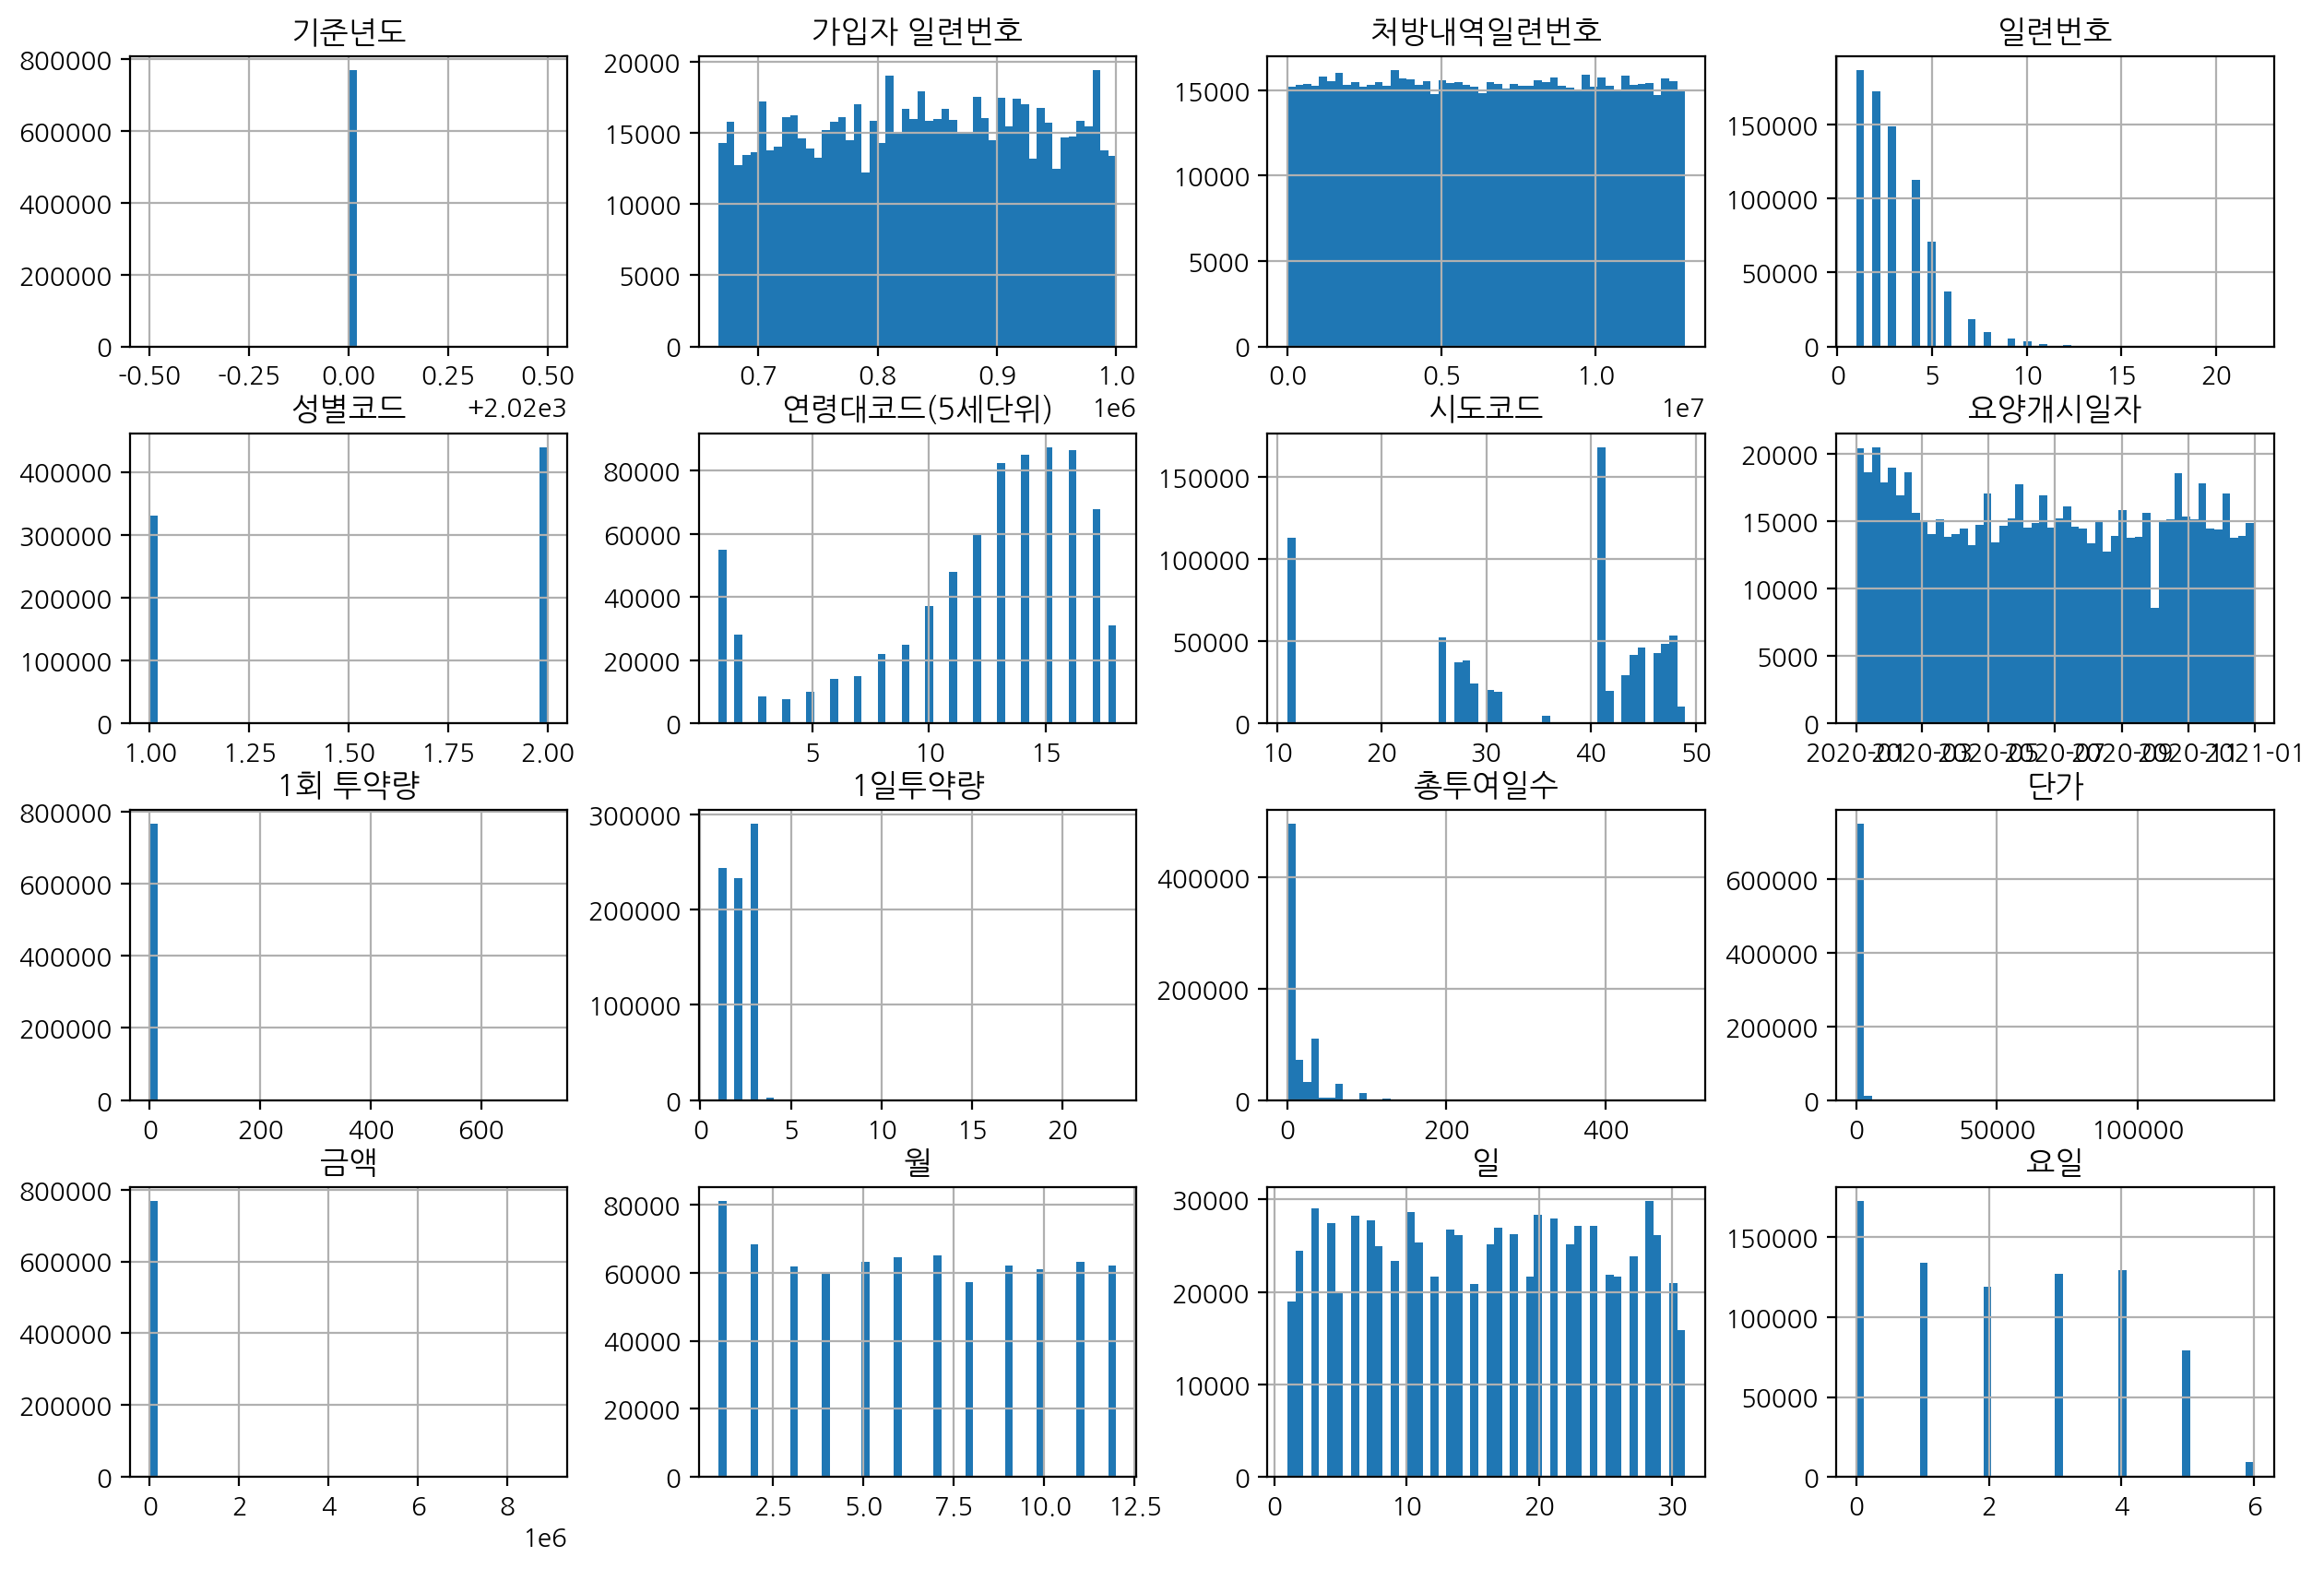

In [40]:
df.hist(bins=50, figsize=(15, 10));

## 상관분석 

In [41]:
df.corr()

,기준년도,가입자 일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,1회 투약량,1일투약량,총투여일수,단가,금액,월,일,요일
기준년도,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
가입자 일련번호,NaN,1.000000,0.000482,-0.008469,0.012366,-0.011925,0.008136,-0.000023,0.005283,-0.007093,-0.000497,-0.000909,-0.000918,0.000204,0.000396
처방내역일련번호,NaN,0.000482,1.000000,-0.000633,0.004487,0.006647,0.001209,-0.001145,-0.005706,0.003151,0.000913,-0.000360,-0.000967,-0.003228,-0.000740
일련번호,NaN,-0.008469,-0.000633,1.000000,0.007466,0.046063,0.034556,-0.029619,-0.047068,0.040129,0.025808,0.009557,-0.011556,-0.003647,-0.004366
성별코드,NaN,0.012366,0.004487,0.007466,1.000000,0.081297,-0.006522,0.003240,0.009749,-0.026553,-0.014530,-0.014549,0.001749,-0.001547,-0.010209
연령대코드(5세단위),NaN,-0.011925,0.006647,0.046063,0.081297,1.000000,0.017827,-0.052421,-0.231686,0.253755,0.032048,0.070850,0.007217,-0.000235,-0.087083
시도코드,NaN,0.008136,0.001209,0.034556,-0.006522,0.017827,1.000000,-0.011816,-0.012300,-0.004086,-0.005261,-0.006795,0.014560,-0.007094,-0.001119
1회 투약량,NaN,-0.000023,-0.001145,-0.029619,0.003240,-0.052421,-0.011816,1.000000,-0.061925,-0.050168,-0.007154,0.041220,0.002198,0.000169,0.004498
1일투약량,NaN,0.005283,-0.005706,-0.047068,0.009749,-0.231686,-0.012300,-0.061925,1.000000,-0.406659,-0.176786,-0.127898,-0.055795,-0.003778,0.038593
총투여일수,NaN,-0.007093,0.003151,0.040129,-0.026553,0.253755,-0.004086,-0.050168,-0.406659,1.000000,-0.037856,0.275837,0.048568,0.004001,-0.048576


<AxesSubplot:>

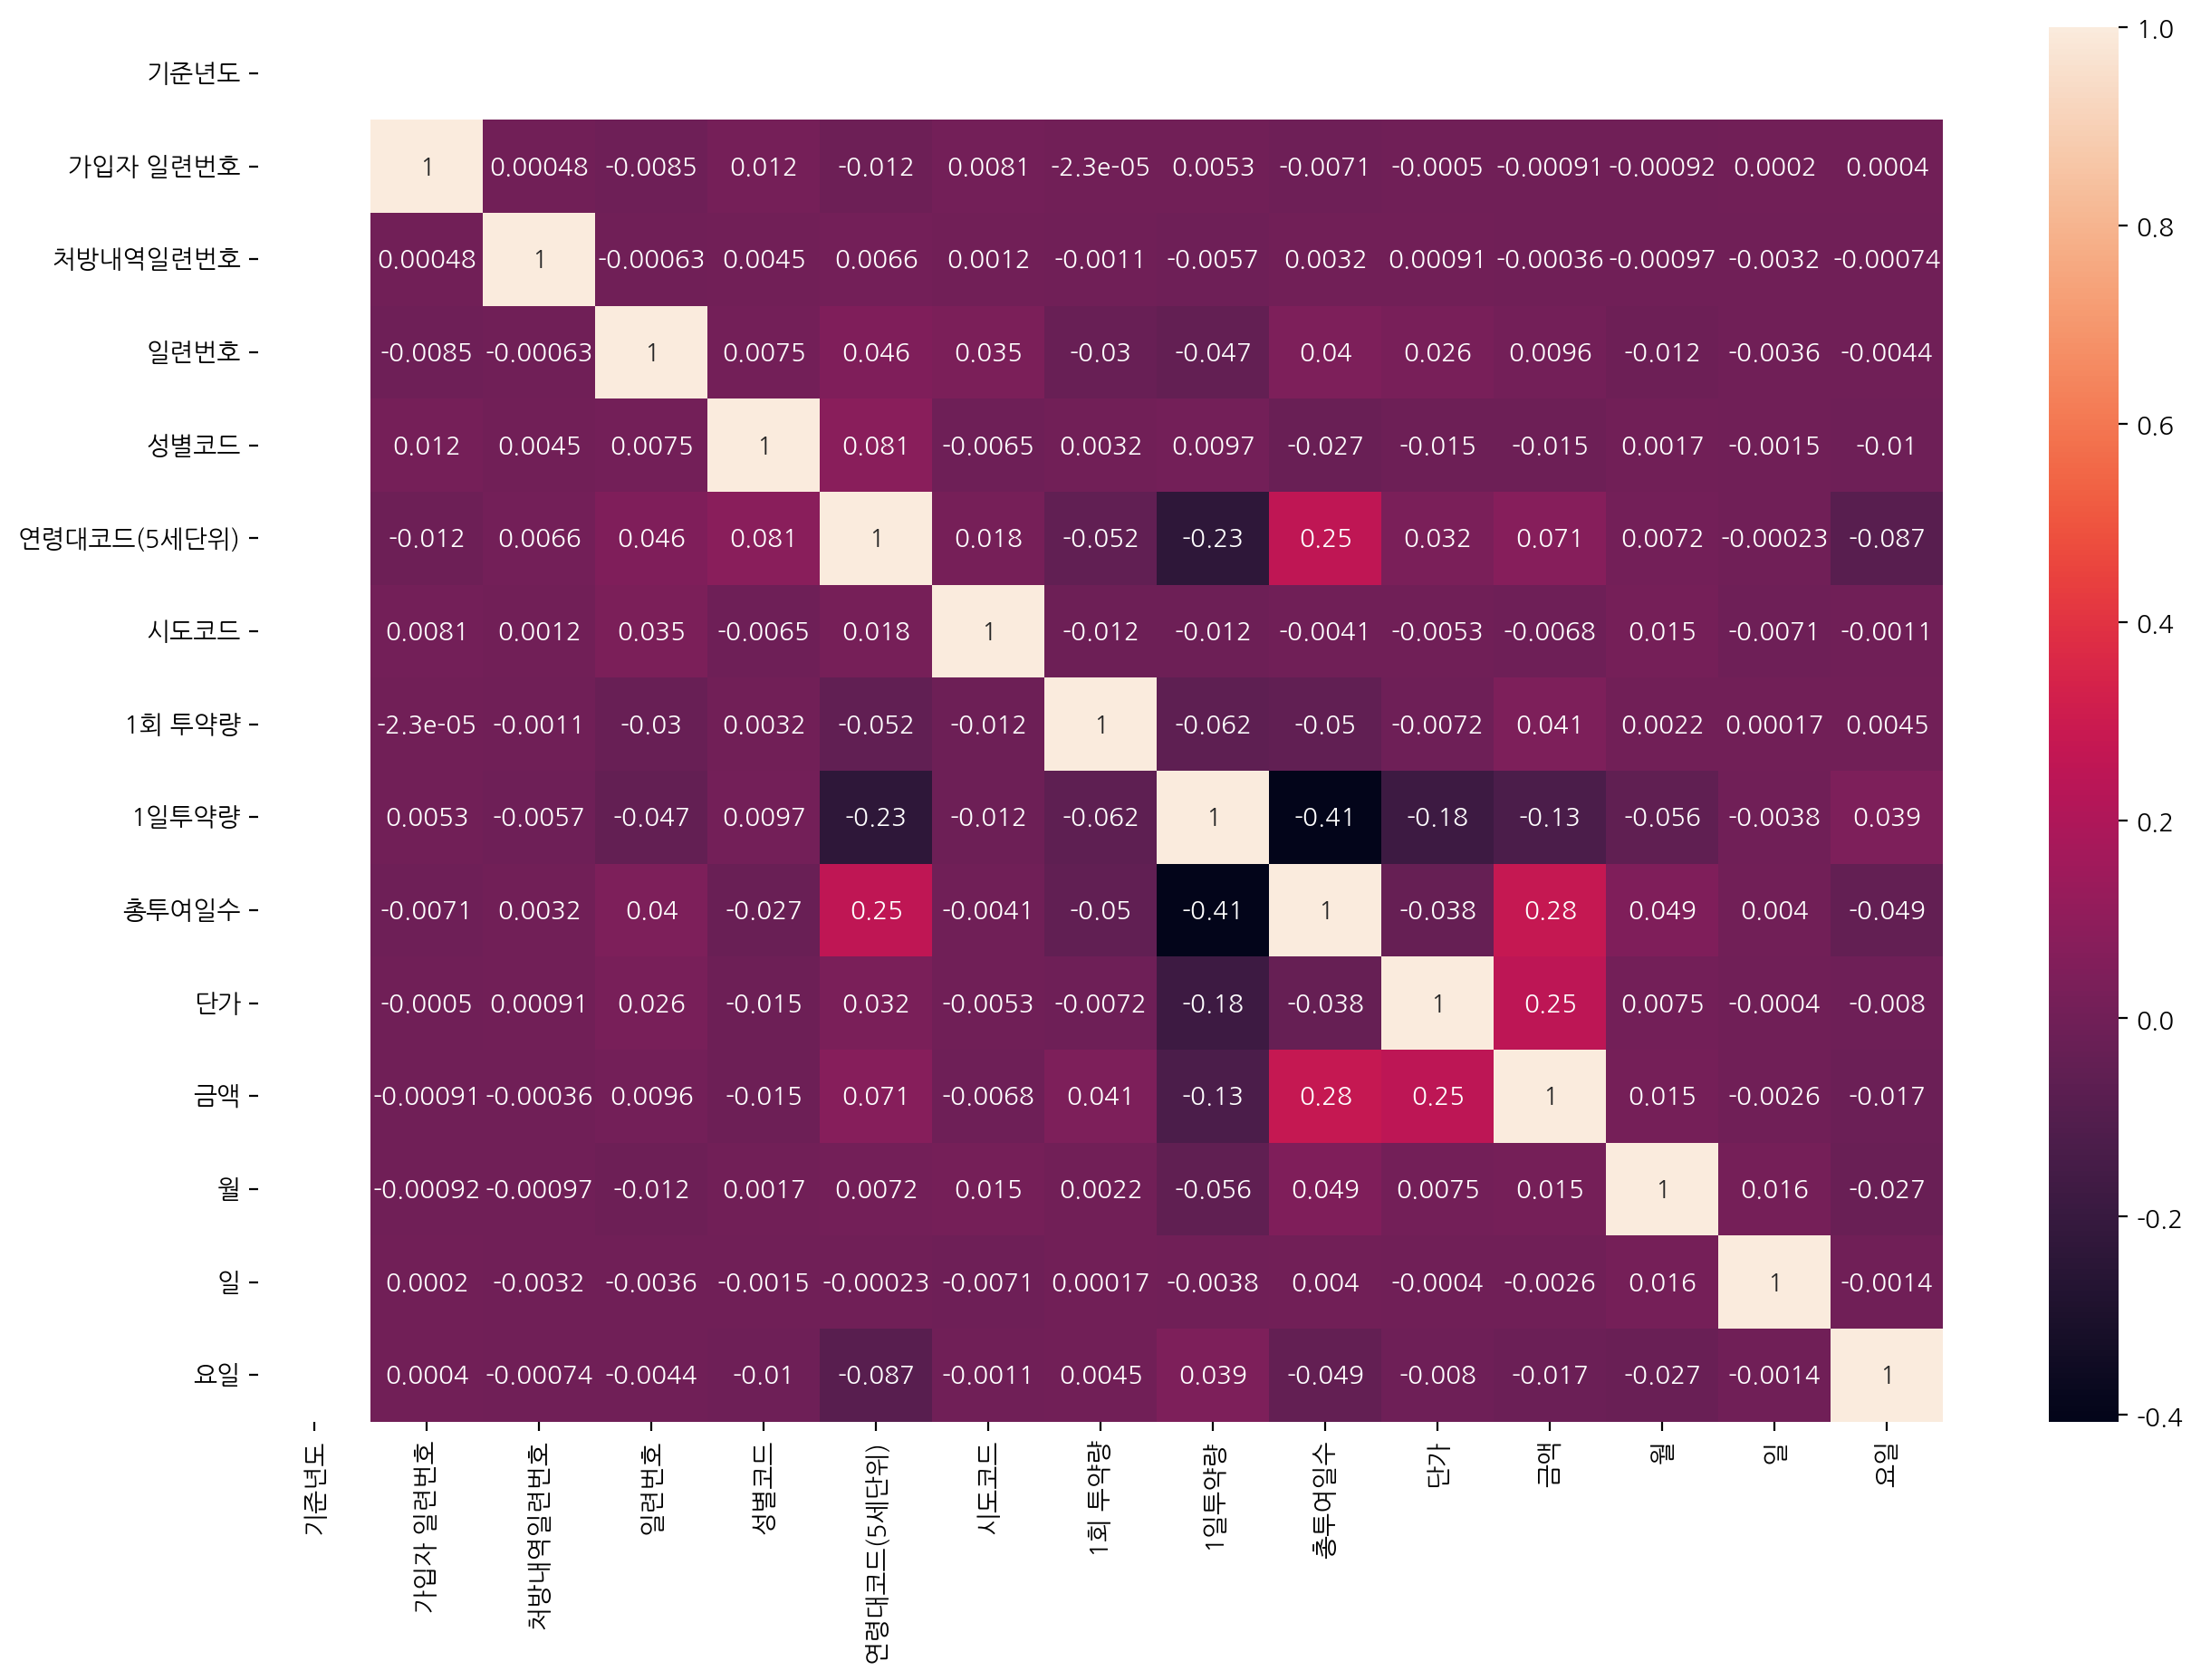

In [42]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True)

In [43]:
# shape 만큼 1로 채워주는 array
np.ones_like(df.corr())

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.

In [44]:
# np.triu : 상삼각행렬
# np.tril : 하삼각행렬
mask = np.triu(np.ones_like(df.corr()))
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0.

<AxesSubplot:>

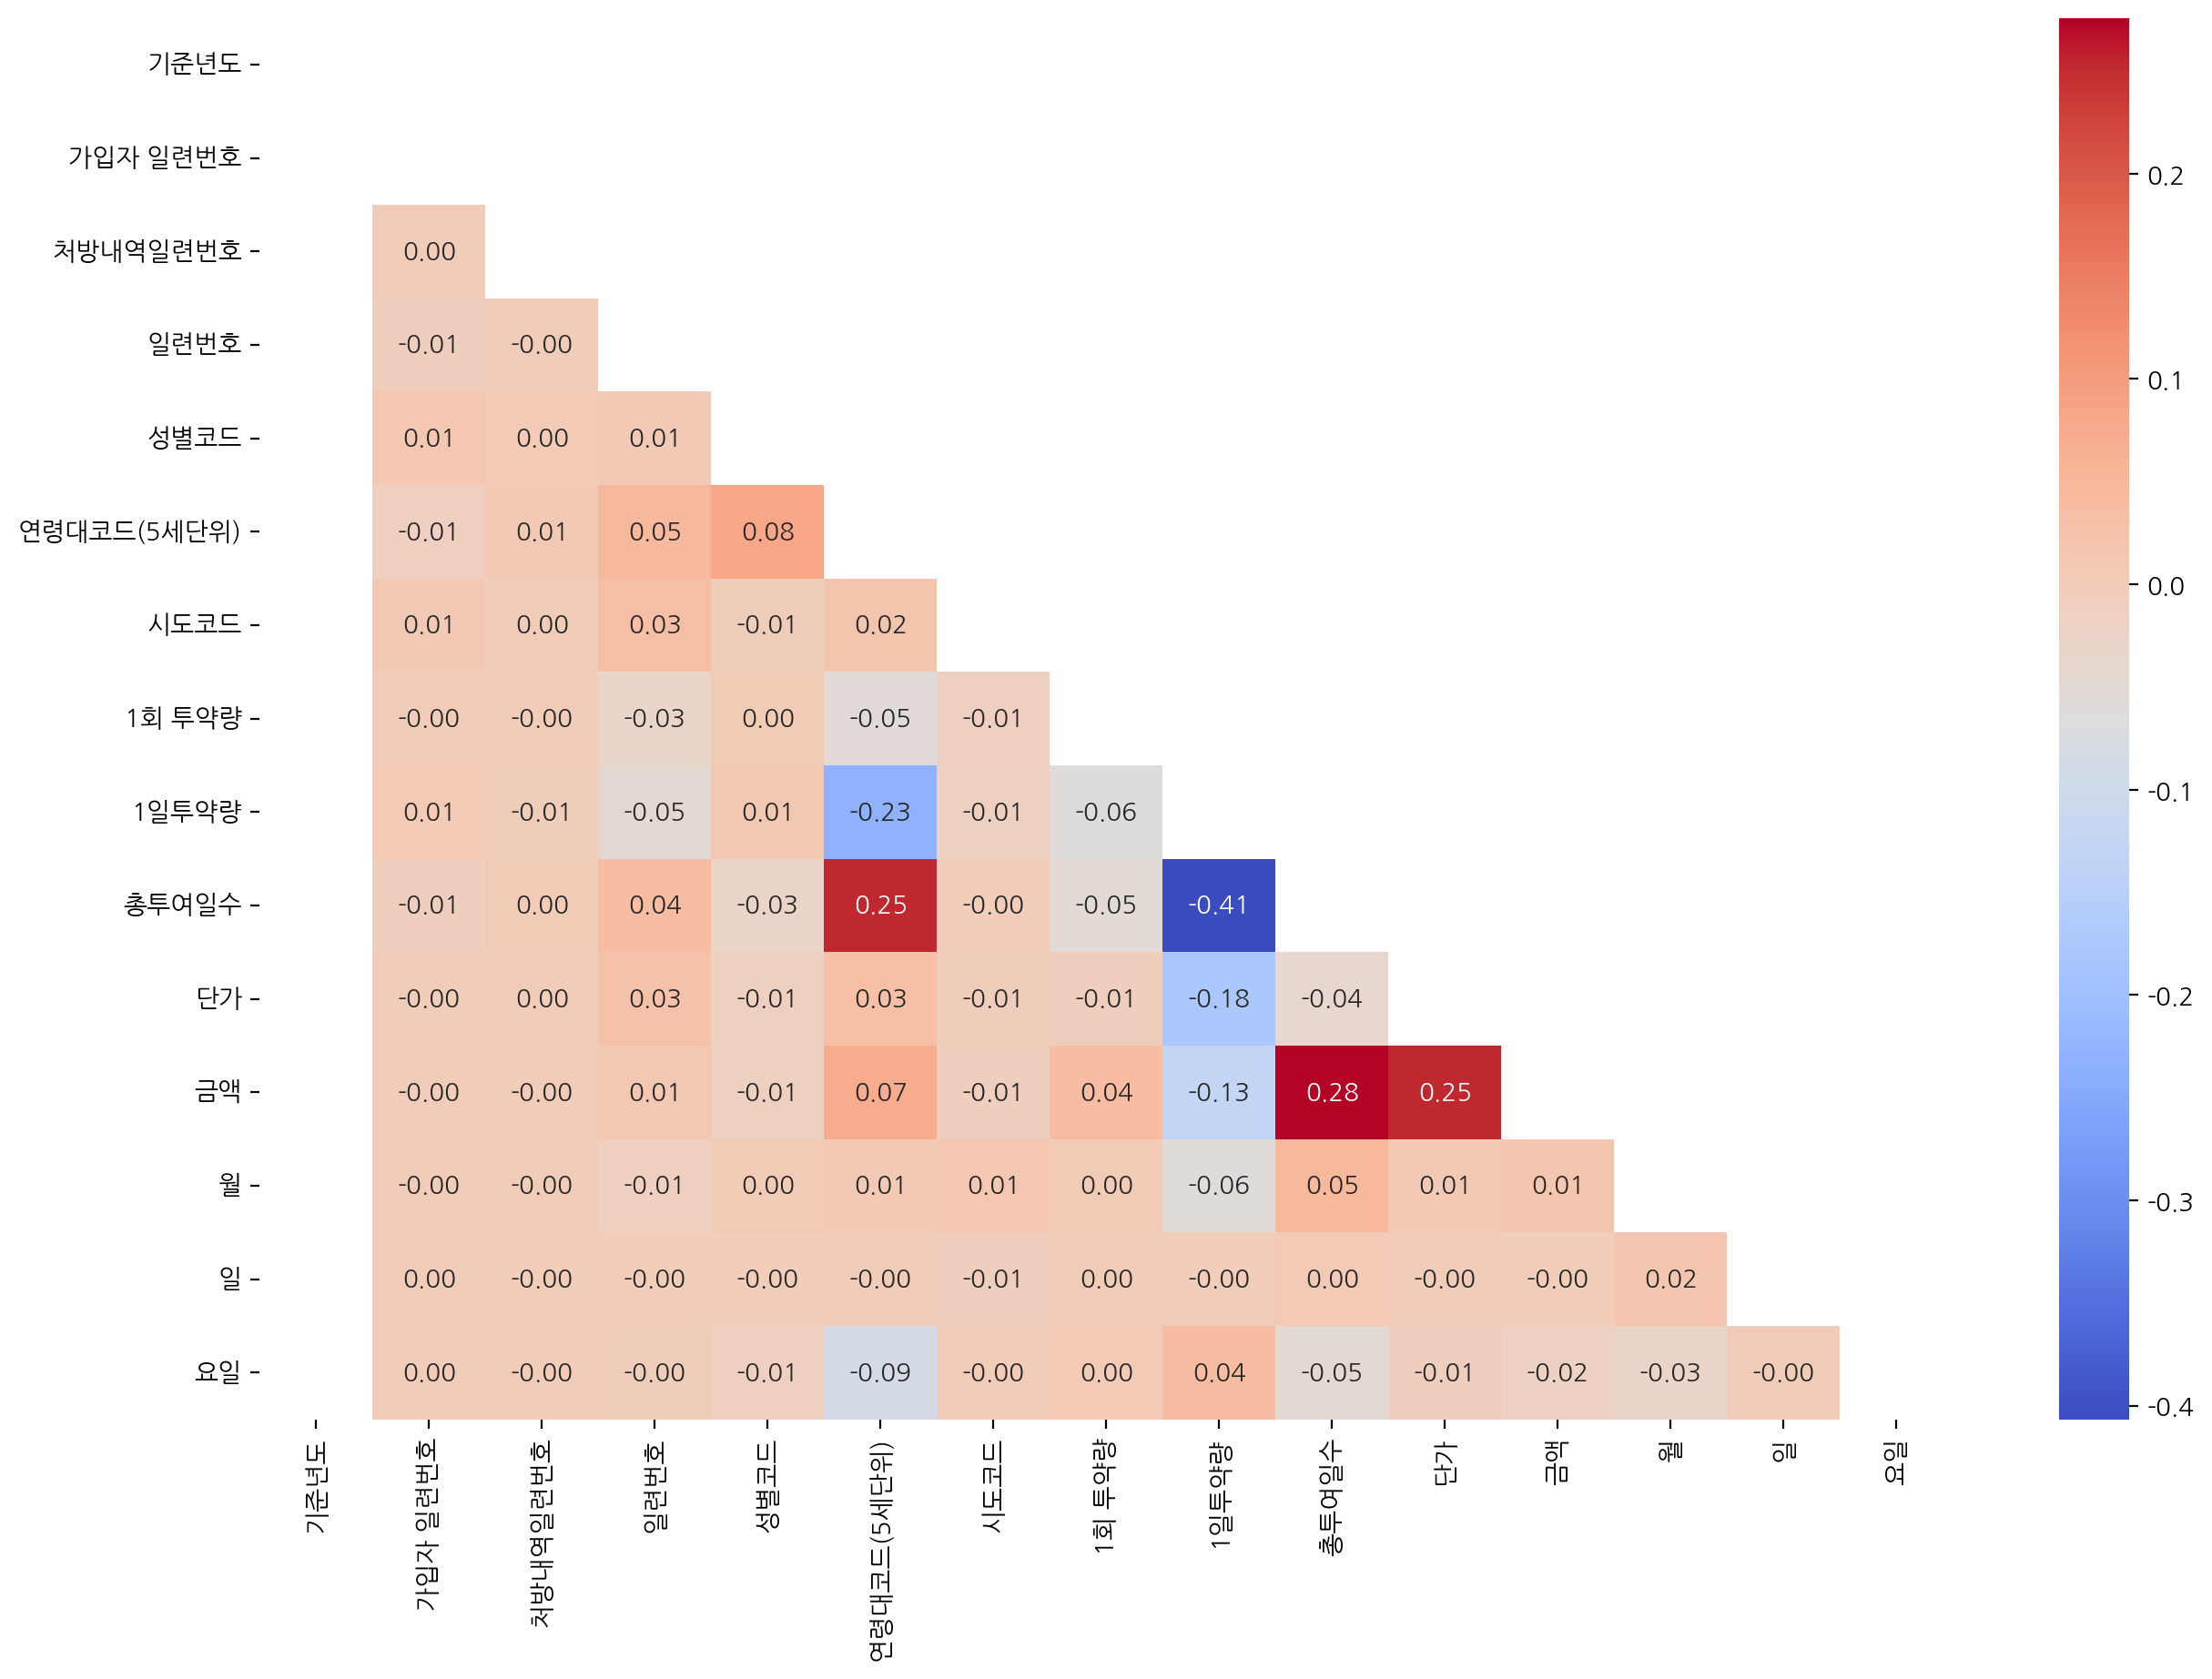

In [45]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", mask=mask, fmt=".2f")

<AxesSubplot:>

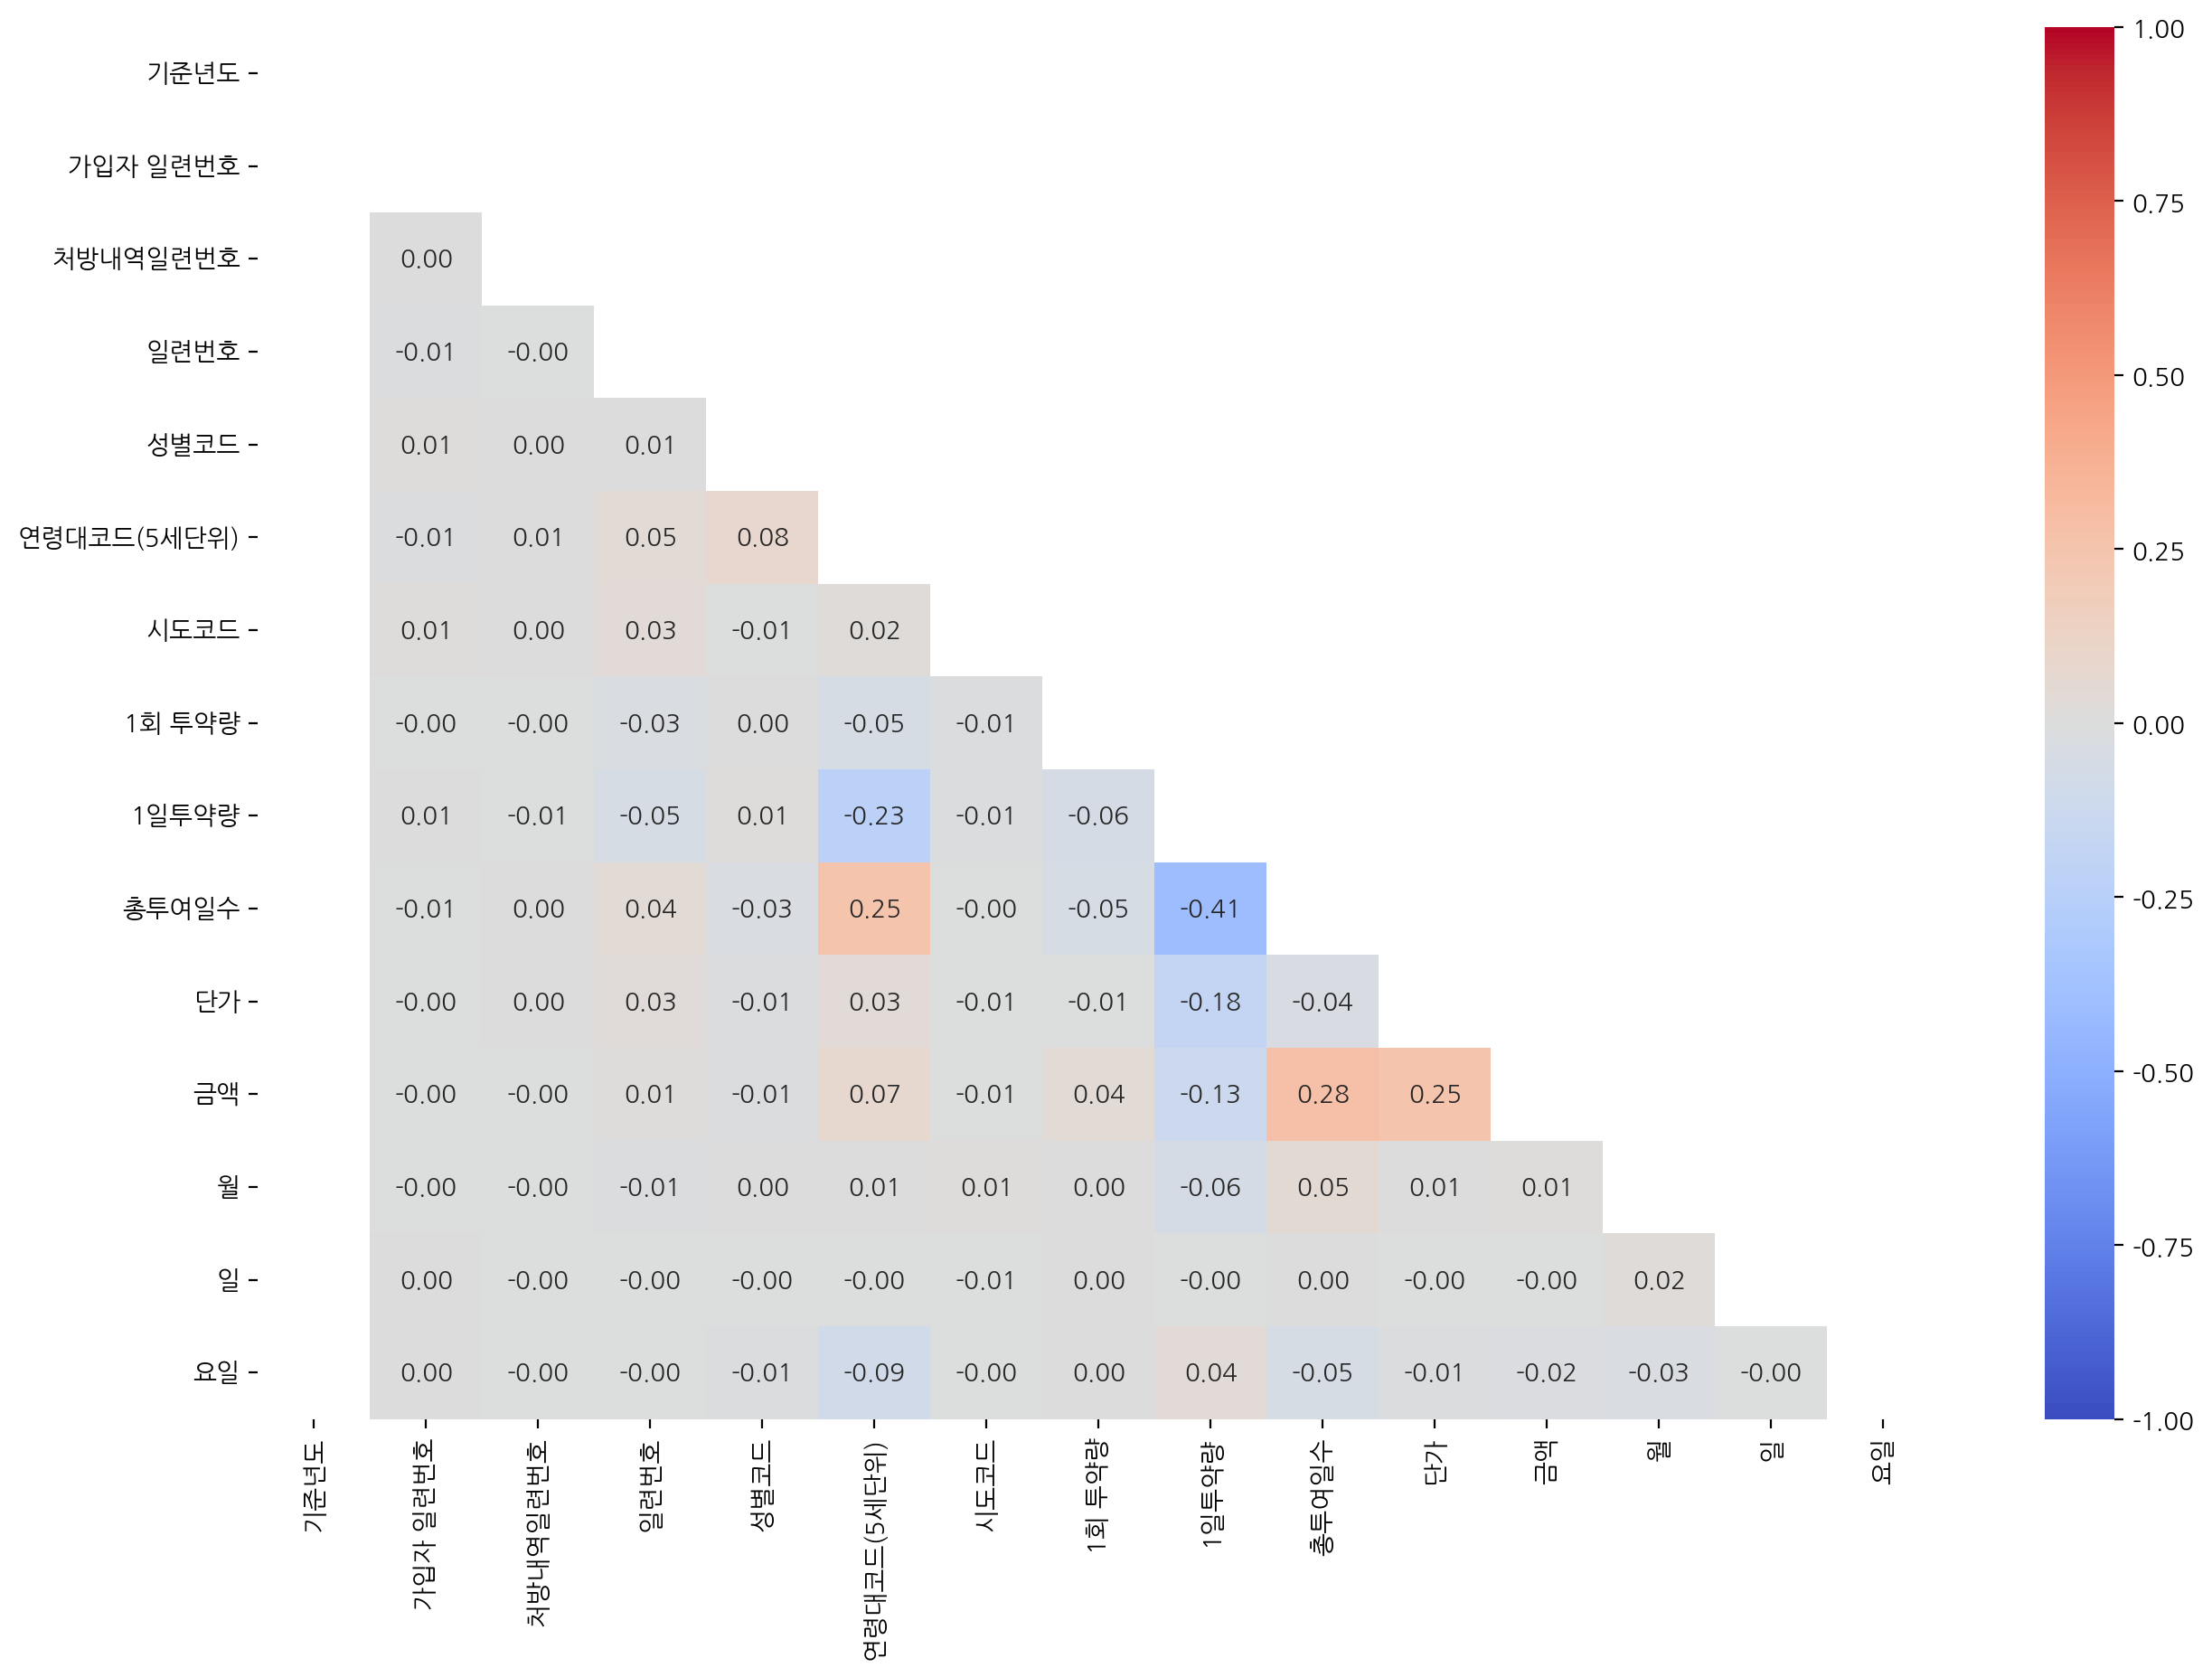

In [46]:
# vmax=1 : 최댓값 지정 
# vmin=-1 : 최솟값 지정
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", mask=mask, fmt=".2f", vmax=1, vmin=-1)

## 기간별 시각화

### 월별 처방 수

<AxesSubplot:xlabel='월', ylabel='count'>

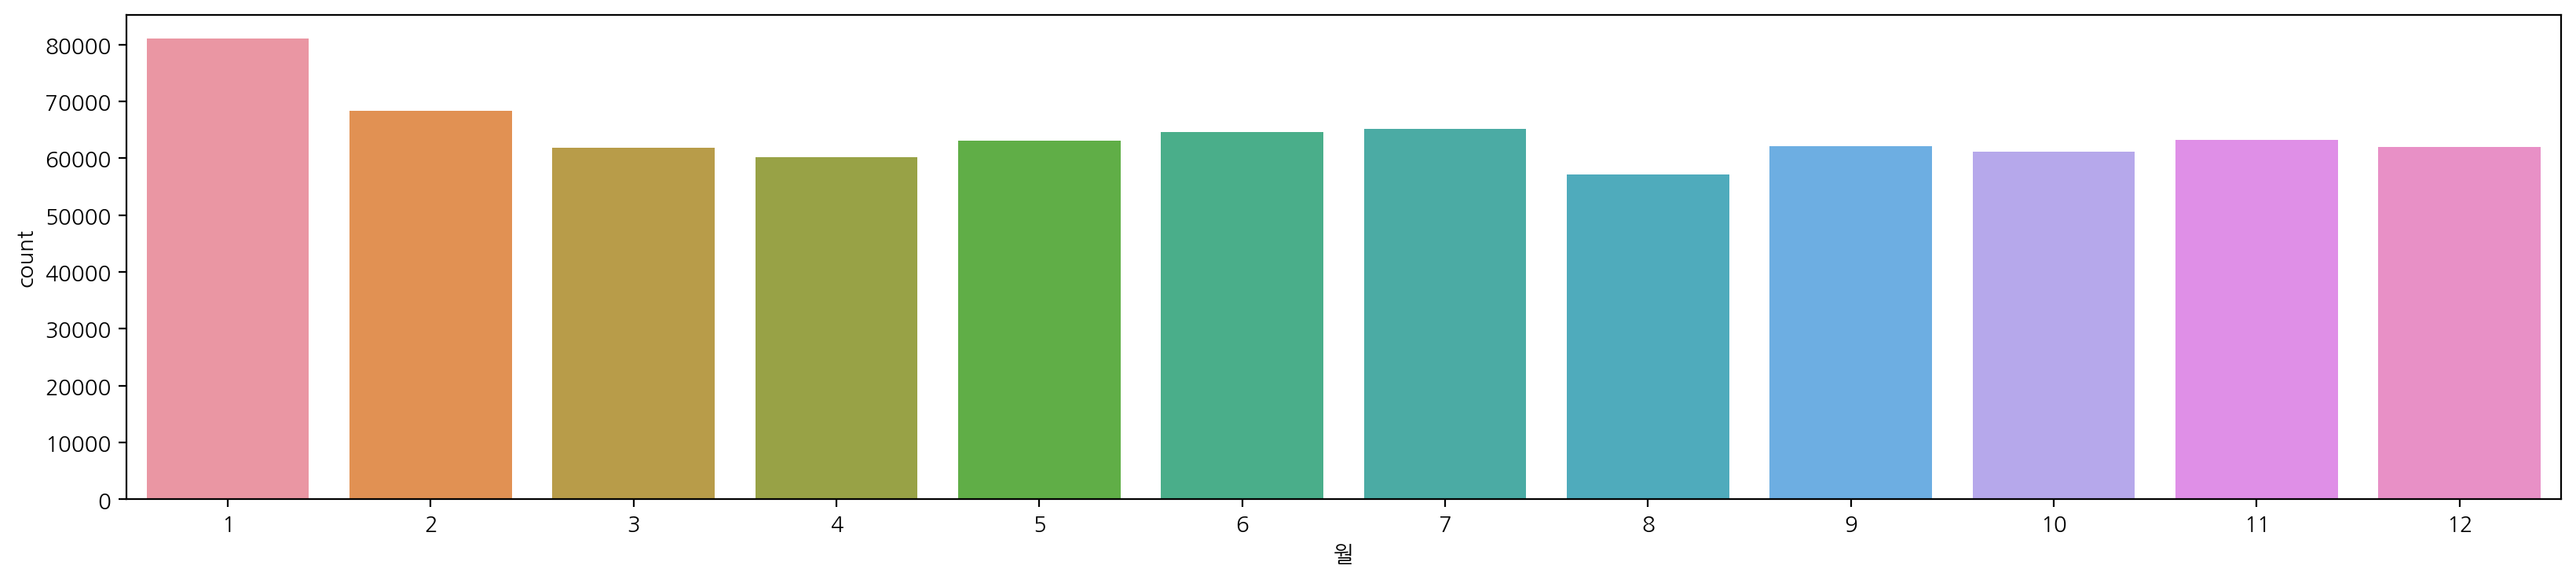

In [47]:
plt.figure(figsize=(20, 4))
sns.countplot(df, x="월")

### 일별 처방 수

<AxesSubplot:xlabel='일', ylabel='count'>

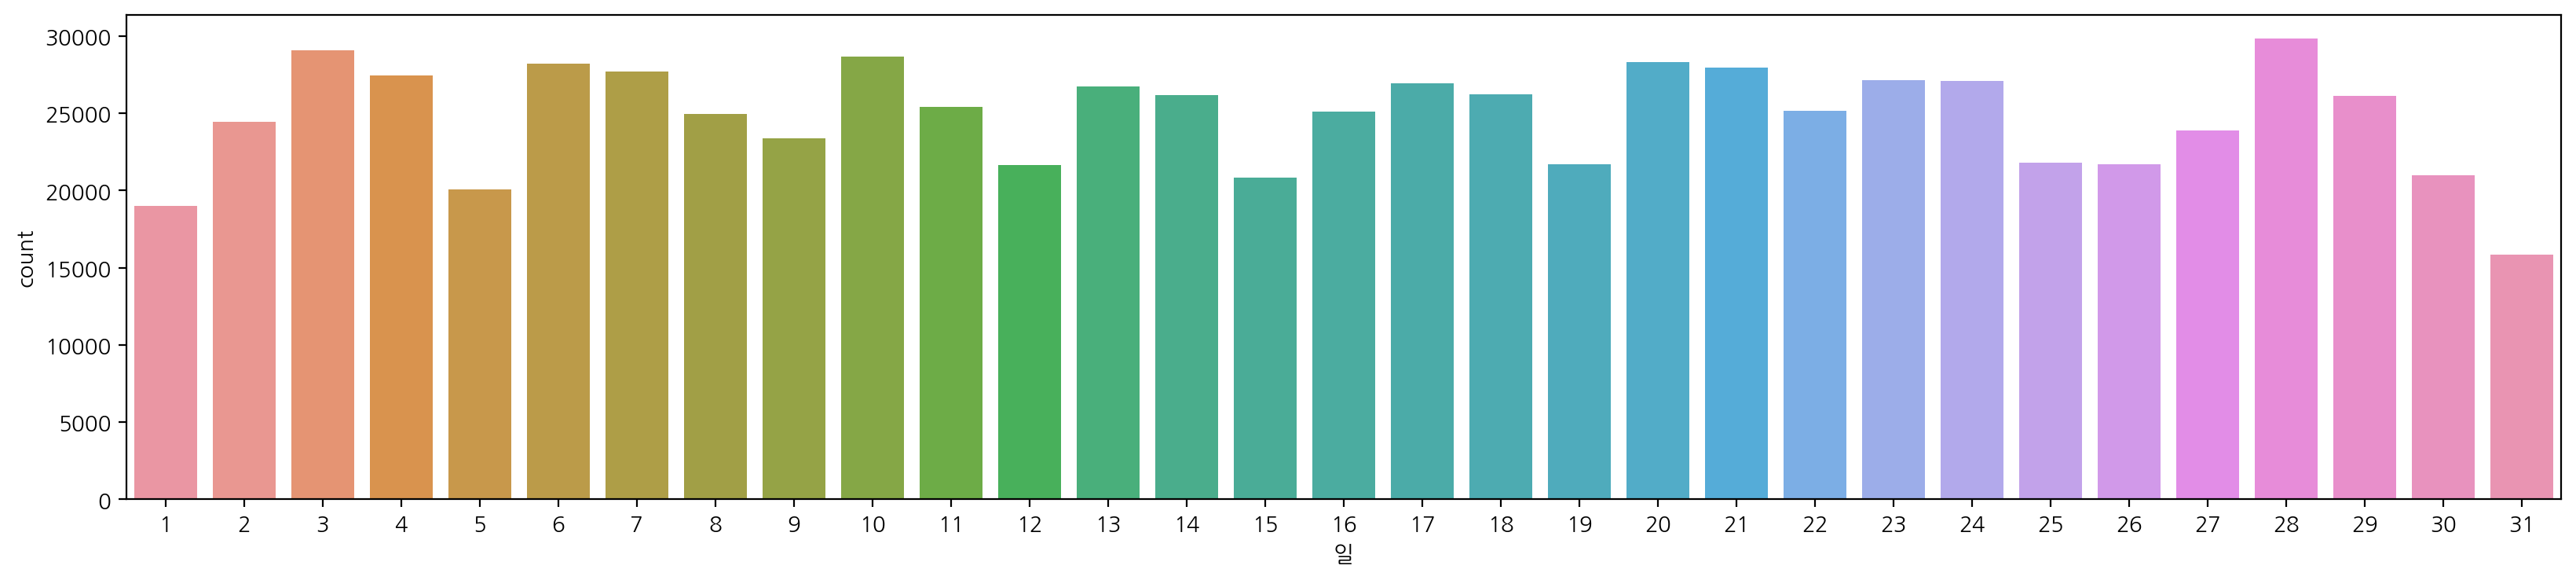

In [48]:
plt.figure(figsize=(20, 4))
sns.countplot(df, x="일")

### 요일별 처방 수 

<AxesSubplot:xlabel='영문요일', ylabel='count'>

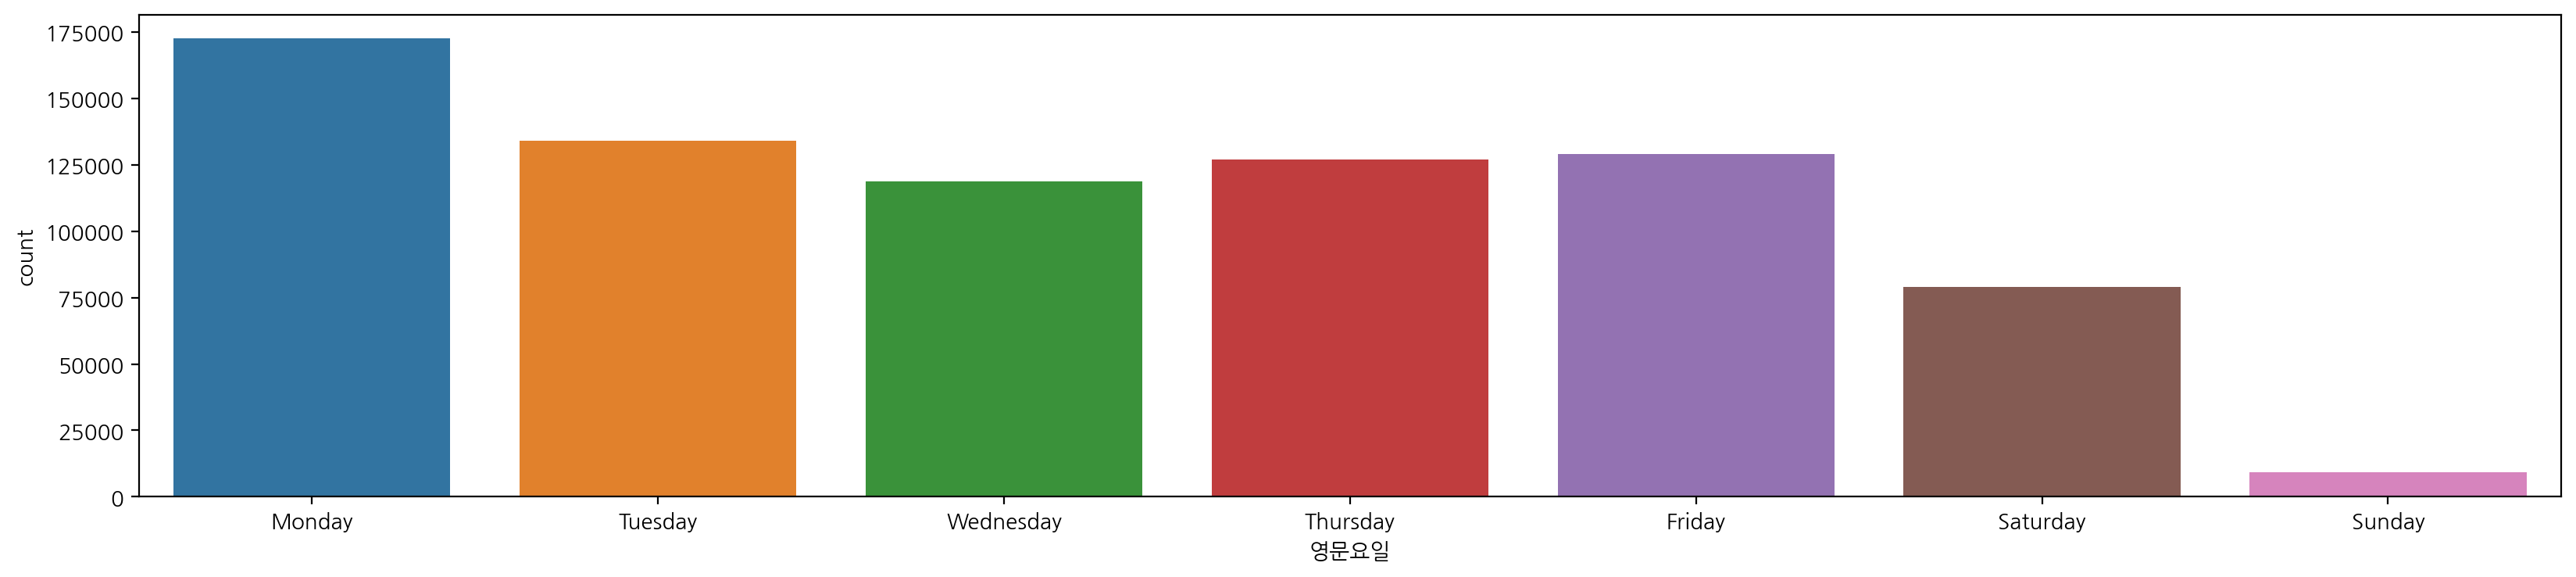

In [49]:
plt.figure(figsize=(20, 4))
weekday = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.countplot(df, x="영문요일", order=weekday)

<AxesSubplot:xlabel='영문요일', ylabel='count'>

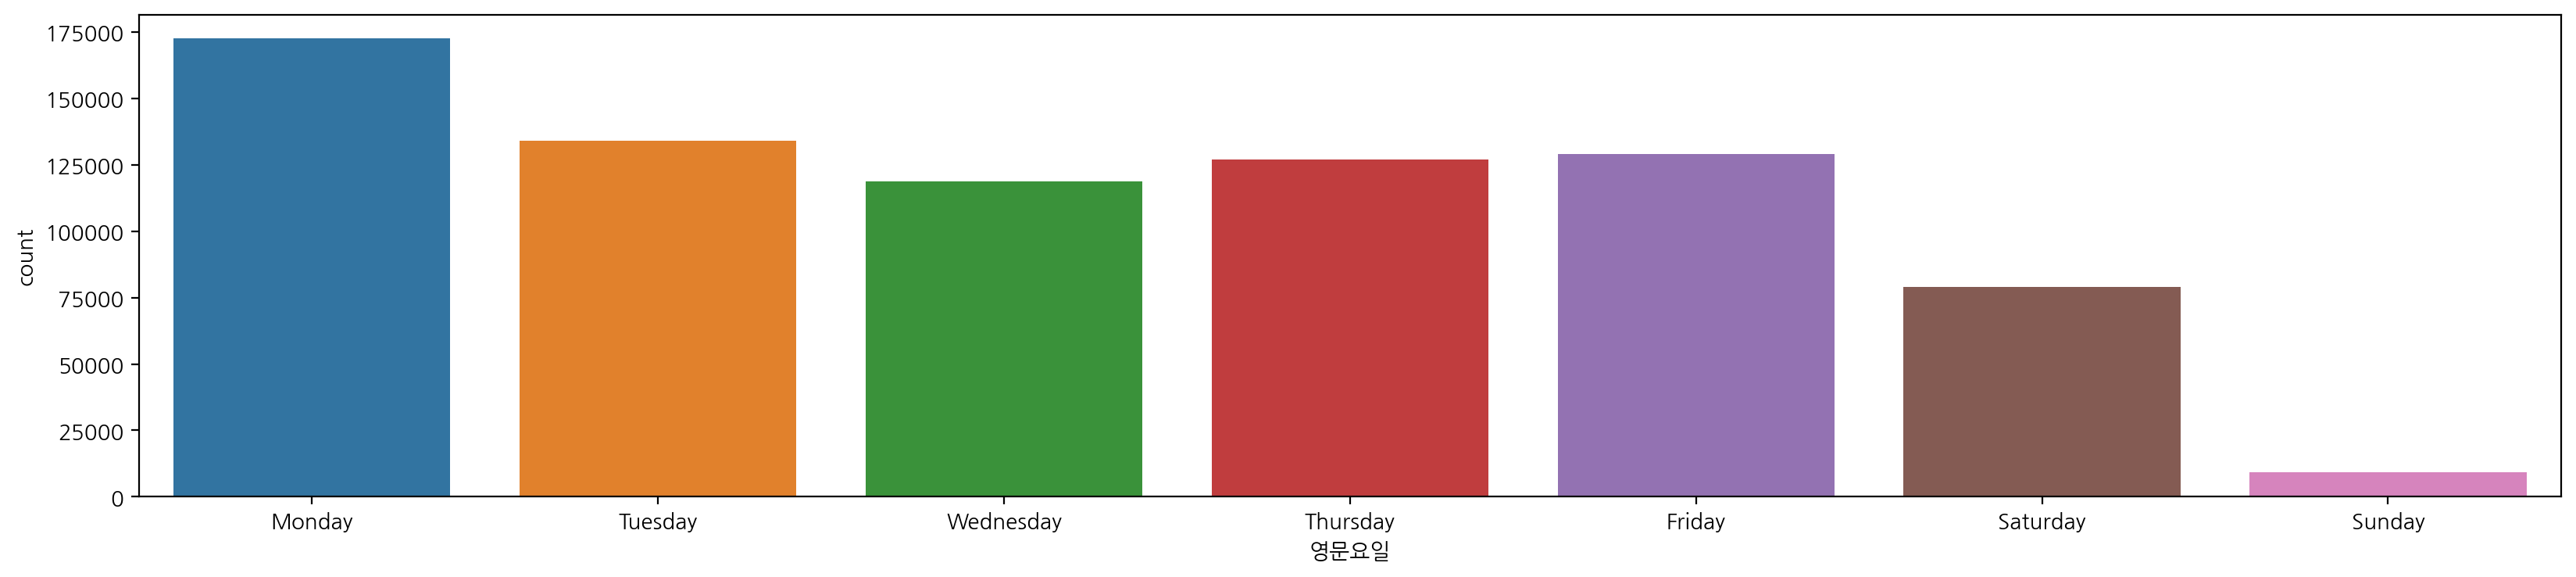

In [50]:
# 조은님의 정렬 방법
plt.figure(figsize=(20, 4))
sns.countplot(data=df.sort_values("요일"), x="영문요일")

## 연령대별 시각화 

<AxesSubplot:xlabel='연령대', ylabel='count'>

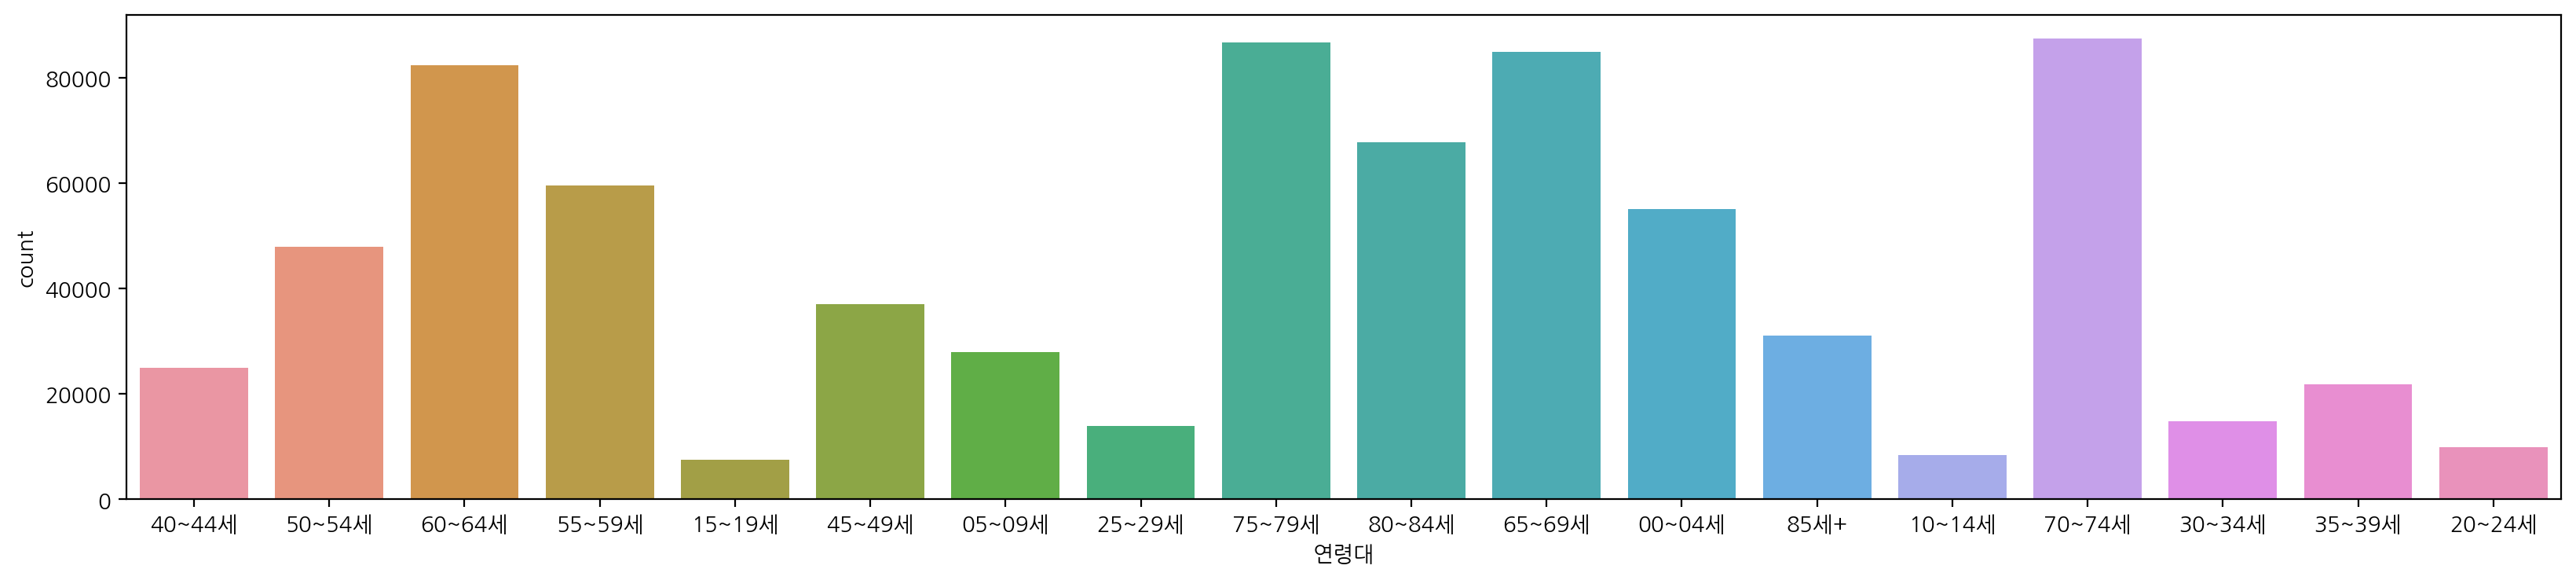

In [51]:
plt.figure(figsize=(20, 4))
sns.countplot(df, x="연령대")

In [52]:
# 나이순 정렬 또 다른 방법
age_dict.values()

dict_values(['00~04세', '05~09세', '10~14세', '15~19세', '20~24세', '25~29세', '30~34세', '35~39세', '40~44세', '45~49세', '50~54세', '55~59세', '60~64세', '65~69세', '70~74세', '75~79세', '80~84세', '85세+'])

<AxesSubplot:xlabel='연령대', ylabel='count'>

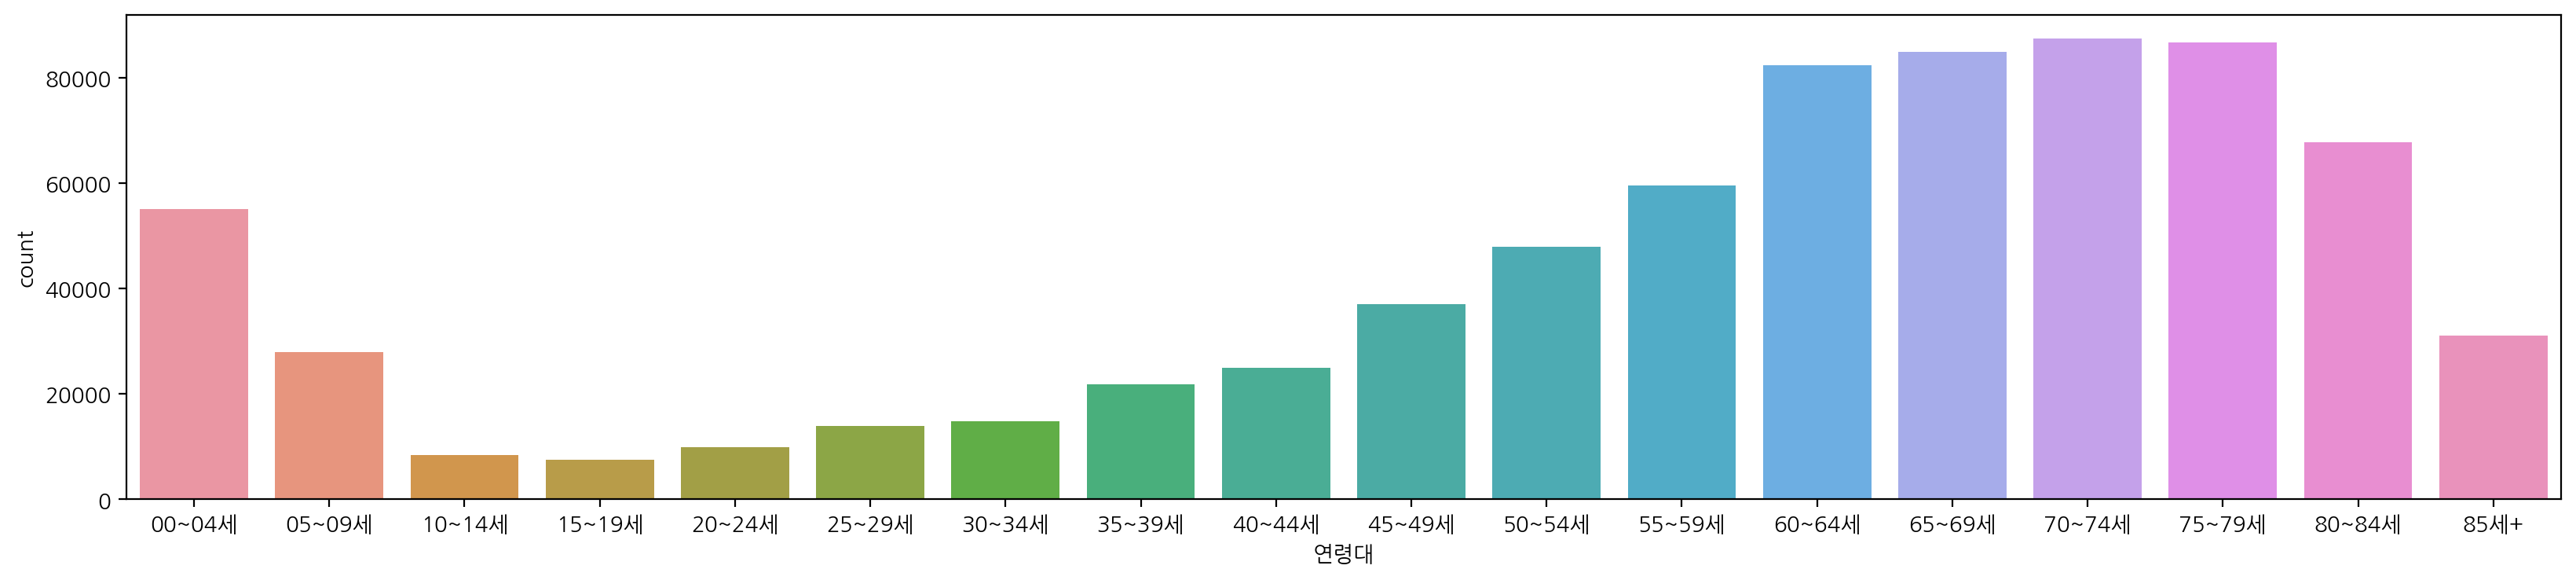

In [53]:
plt.figure(figsize=(20, 4))
sns.countplot(df, x="연령대", order=age_dict.values())

<AxesSubplot:xlabel='연령대', ylabel='count'>

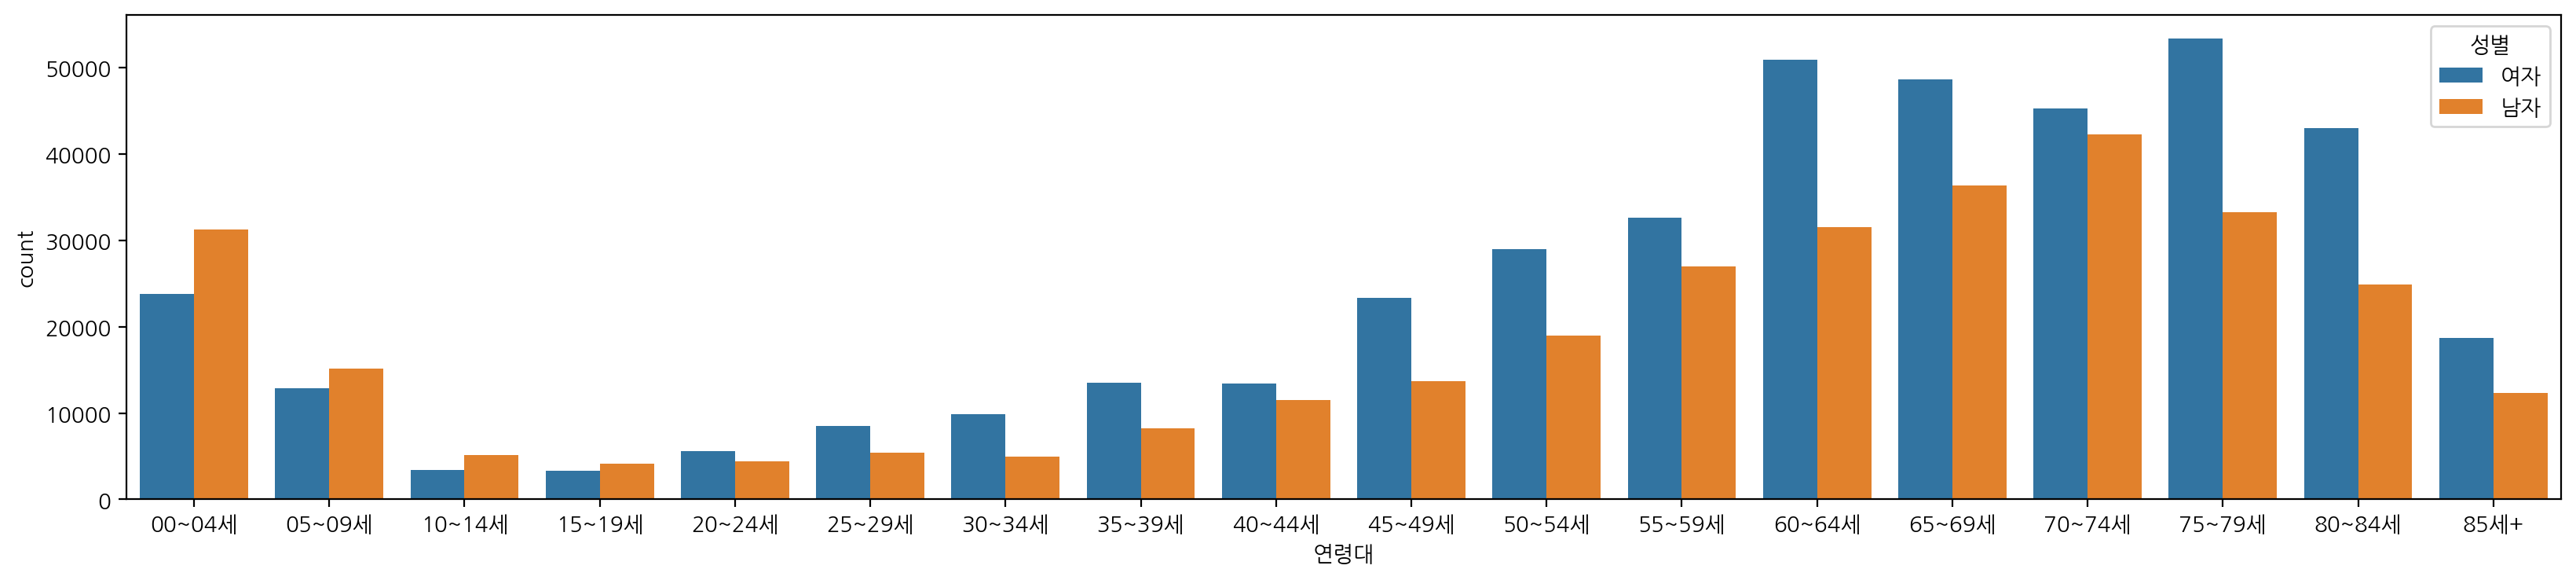

In [54]:
plt.figure(figsize=(20, 4))
sns.countplot(df.sort_values("연령대"), x="연령대", hue="성별")

# 그룹별 시각화 

In [55]:
# 연령대 기준 금액의 합
df.groupby("연령대")["금액"].sum()

연령대
00~04세     64721206
05~09세     51700905
10~14세     20692161
15~19세     29576939
20~24세     38123783
25~29세     51641388
30~34세     60723090
35~39세    140004575
40~44세    150548318
45~49세    277200042
50~54세    373048594
55~59세    573685228
60~64세    843748740
65~69세    909423194
70~74세    976732001
75~79세    874386878
80~84세    706009181
85세+      384589358
Name: 금액, dtype: int64

In [56]:
# 연령대, 성별 기준 금액의 합
df.groupby(["연령대", "성별"])["금액"].sum()

연령대     성별
00~04세  남자     37585744
        여자     27135462
05~09세  남자     28770113
        여자     22930792
10~14세  남자     12489874
        여자      8202287
15~19세  남자     15982707
        여자     13594232
20~24세  남자     18948544
        여자     19175239
25~29세  남자     22569614
        여자     29071774
30~34세  남자     26565539
        여자     34157551
35~39세  남자     88511475
        여자     51493100
40~44세  남자     84040754
        여자     66507564
45~49세  남자    110205879
        여자    166994163
50~54세  남자    178844624
        여자    194203970
55~59세  남자    297694002
        여자    275991226
60~64세  남자    406884889
        여자    436863851
65~69세  남자    449079699
        여자    460343495
70~74세  남자    510207390
        여자    466524611
75~79세  남자    353771255
        여자    520615623
80~84세  남자    255622452
        여자    450386729
85세+    남자    149147368
        여자    235441990
Name: 금액, dtype: int64

## 연령대별 평균단가

<AxesSubplot:xlabel='연령대'>

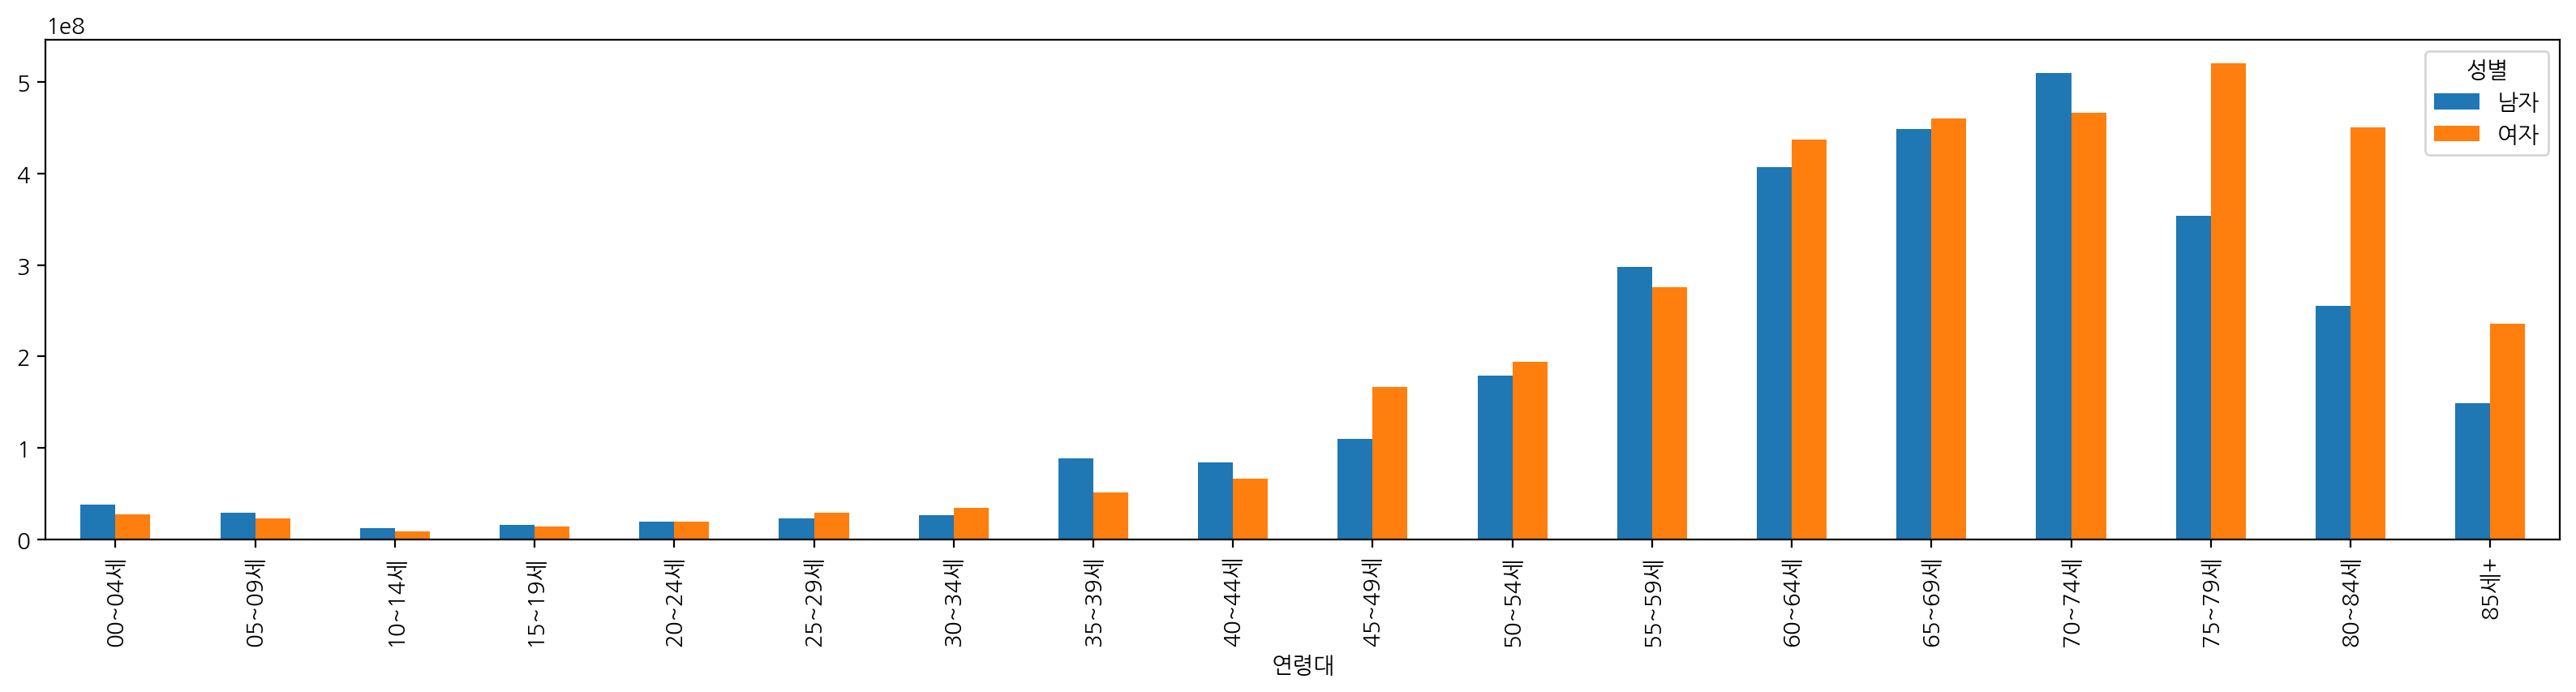

In [57]:
# pivot_table을 이용하여 그래프
pd.pivot_table(df, index='연령대', columns='성별', values='금액', aggfunc='sum').plot(kind='bar', figsize=(20, 4))

<AxesSubplot:xlabel='연령대'>

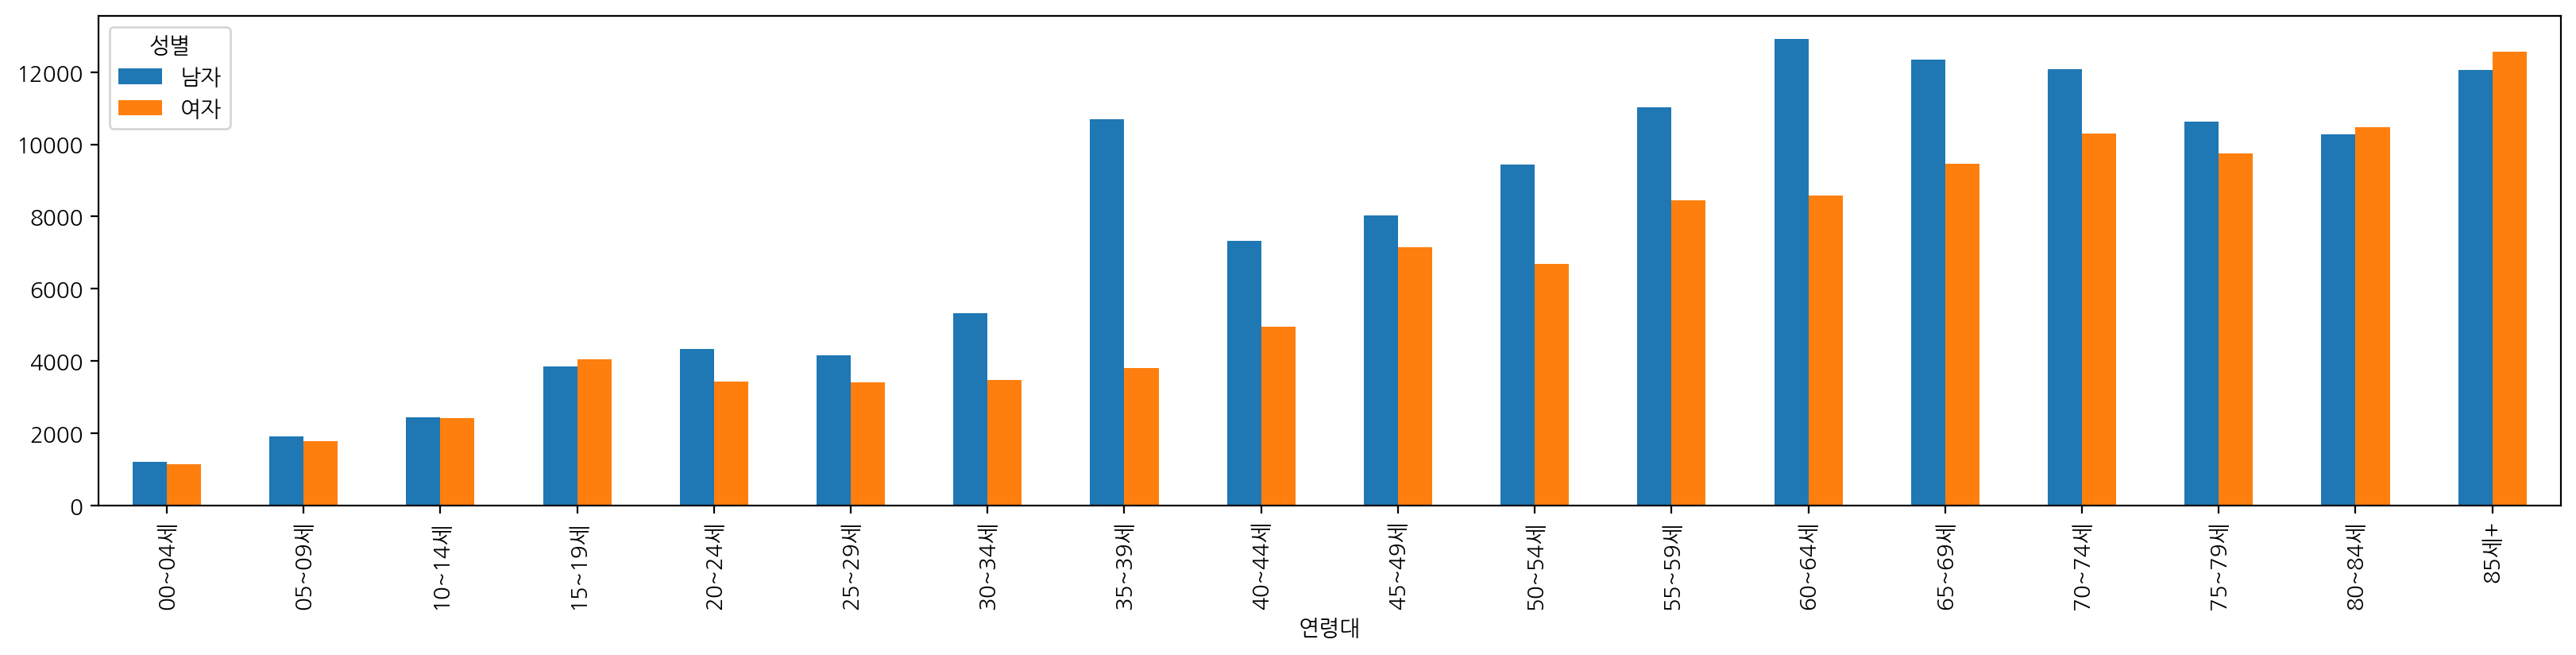

In [58]:
pd.pivot_table(df, index='연령대', columns='성별', values='금액', aggfunc='mean').plot(kind='bar', figsize=(20, 4))

## 투여경로 별 빈도수 시각화

<AxesSubplot:xlabel='count', ylabel='투여경로'>

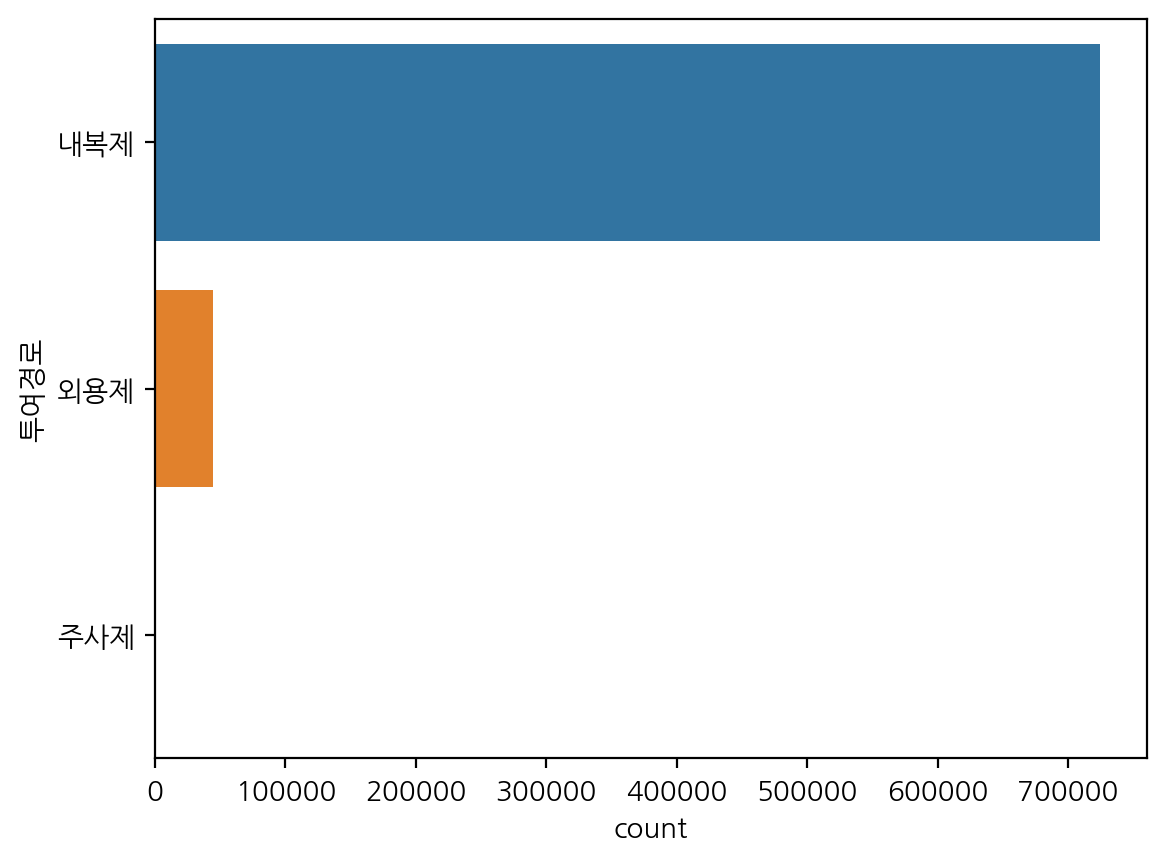

In [59]:
sns.countplot(data=df, y="투여경로")

## 투여경로 별 평균 단가

<AxesSubplot:xlabel='투여경로', ylabel='단가'>

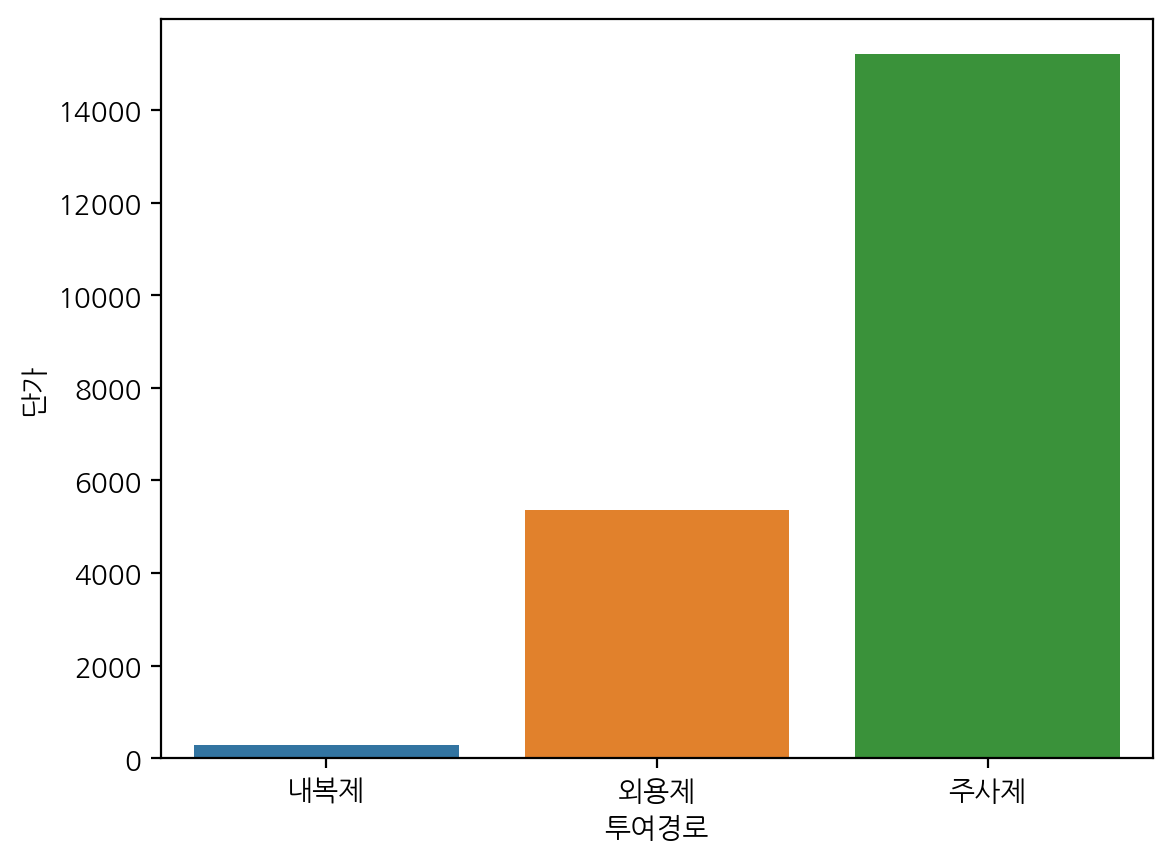

In [61]:
sns.barplot(data=df, x="투여경로", y="단가", errorbar=None)

## 투여경로별 평균 총 투여일수

<AxesSubplot:xlabel='투여경로', ylabel='총투여일수'>

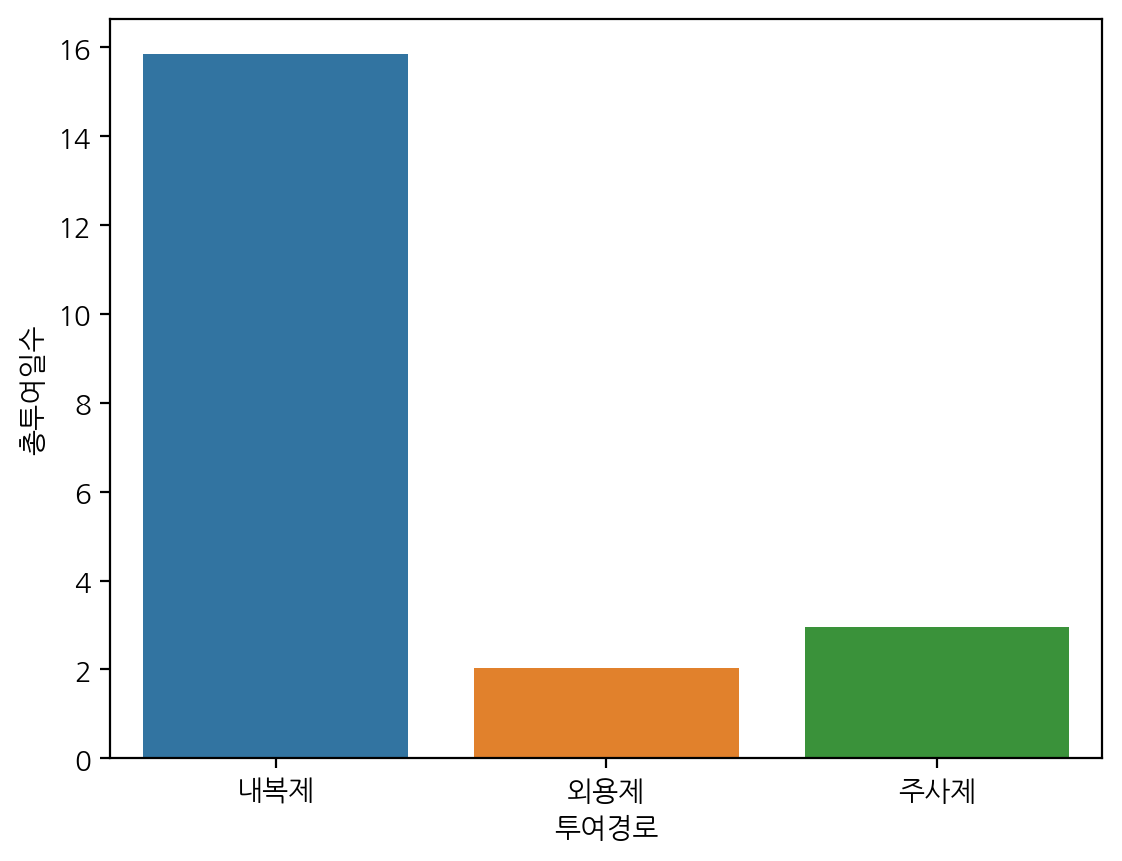

In [63]:
sns.barplot(data=df, x="투여경로", y="총투여일수", errorbar=None)

## 투여경로별 1회 투약량 

<AxesSubplot:xlabel='투여경로', ylabel='1회 투약량'>

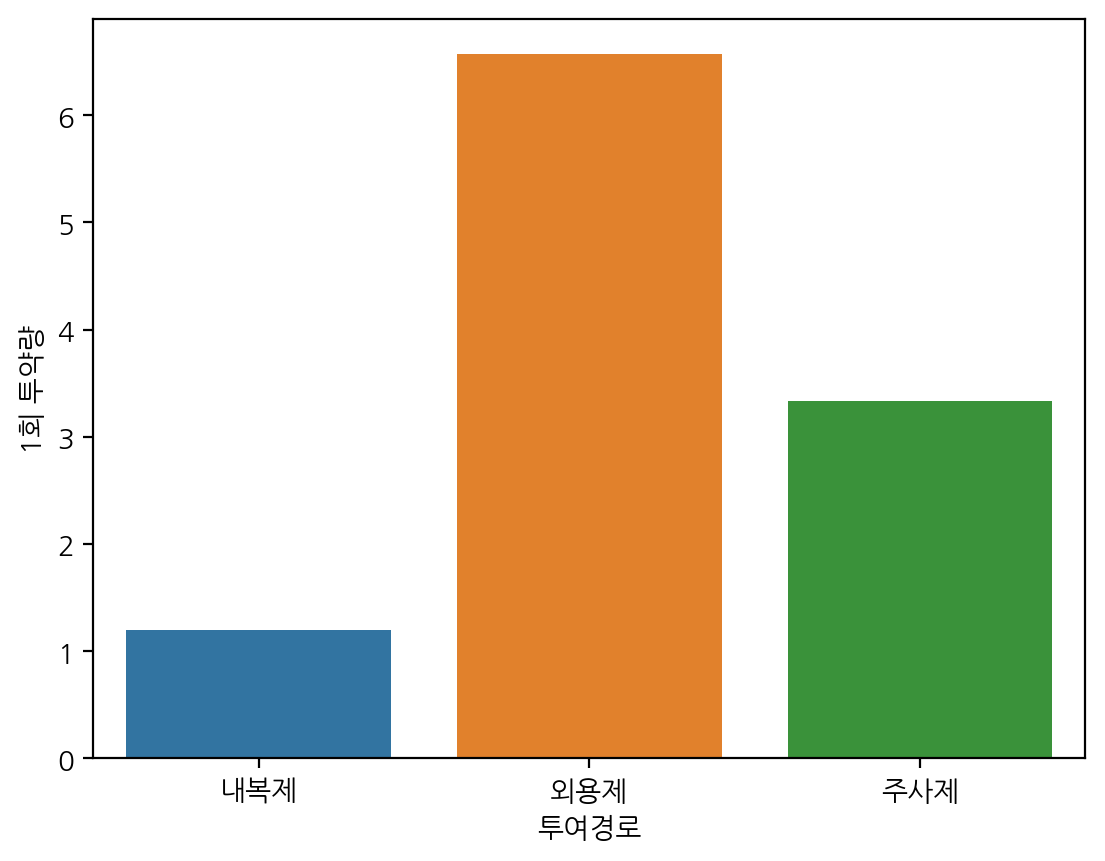

In [64]:
sns.barplot(data=df, x="투여경로", y="1회 투약량",errorbar=None)

## 연령대에 대해 투여경로의 약 처방 횟수 막대그래프 

<AxesSubplot:xlabel='연령대', ylabel='count'>

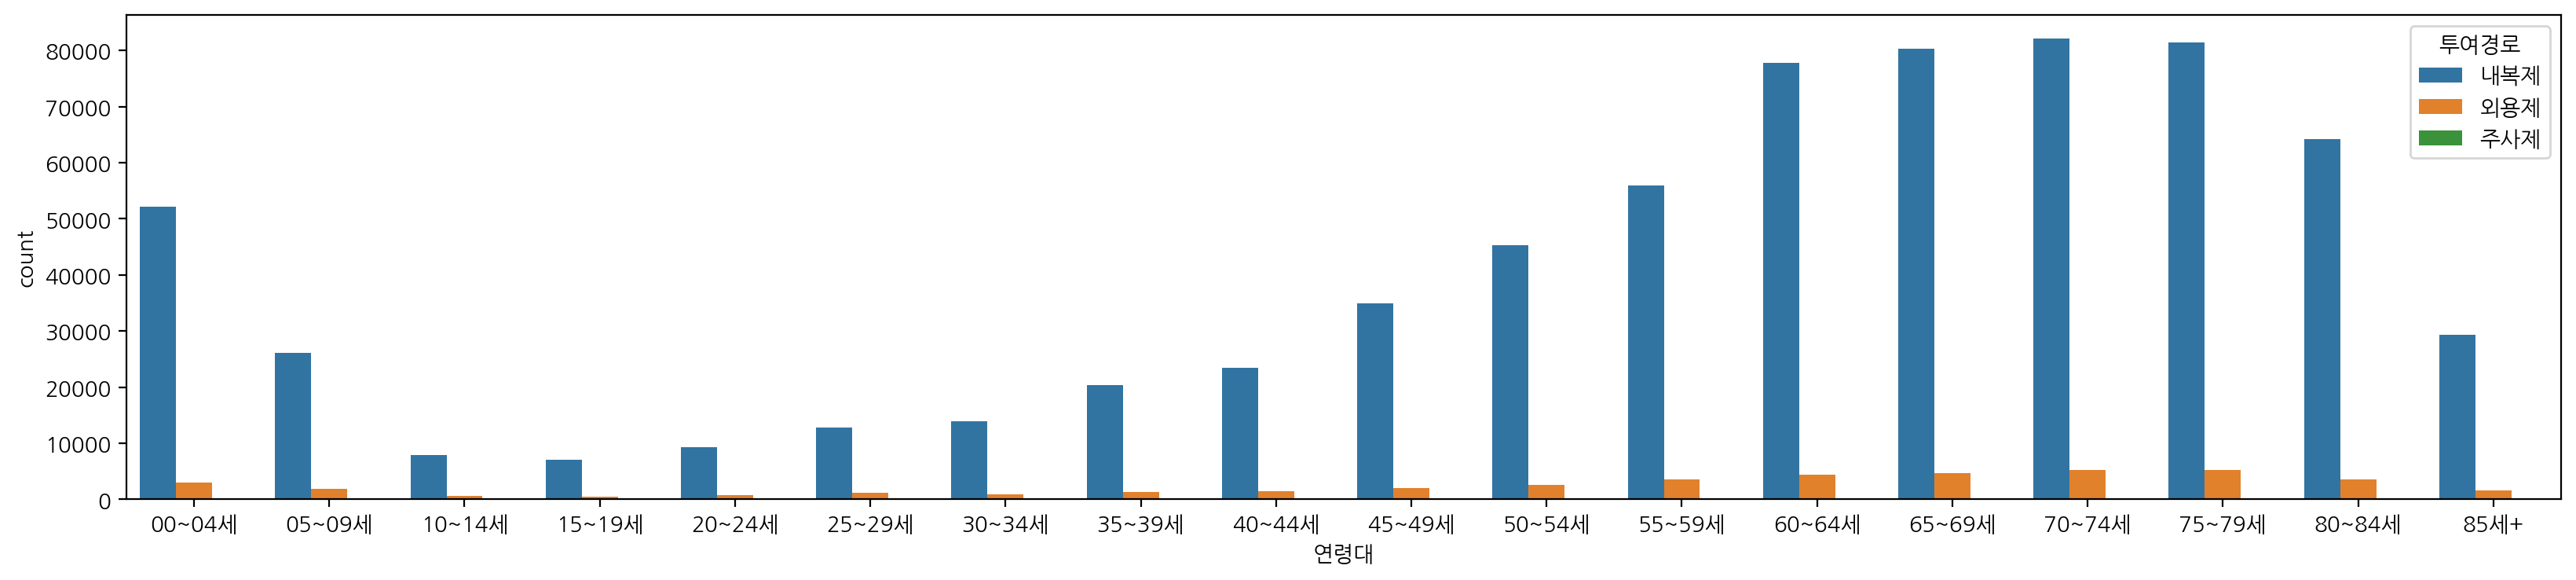

In [69]:
plt.figure(figsize=(20, 4))
sns.countplot(data=df.sort_values("연령대"), x="연령대", hue="투여경로")

<AxesSubplot:xlabel='연령대', ylabel='count'>

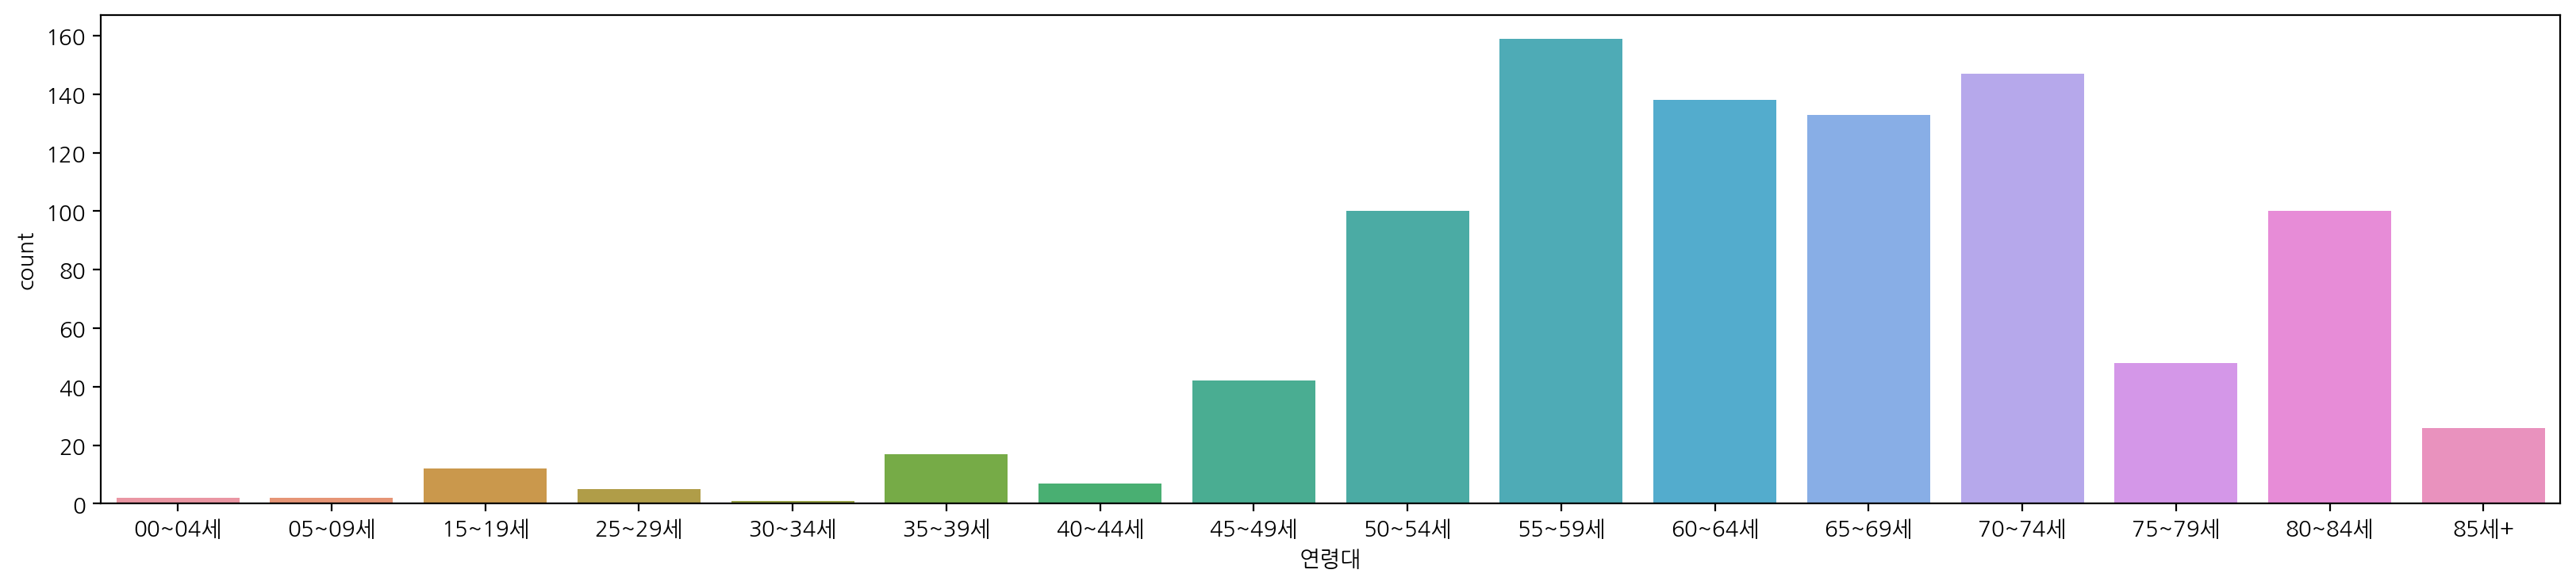

In [71]:
# 주사제 수치가 너무 적어 따로 시각화
plt.figure(figsize=(20, 4))
sns.countplot(data=df[df["투여경로"] == "주사제"].sort_values("연령대"), x="연령대")